# Project: A Study of World Countries in demographic, social and economic context

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### What is Demography? 
>**Demography** is the study of human populations including the size, composition and distribution across space and the process through which populations change. Population stability or change depends on the 'Big Three' factors of demography- Births, Deaths and Migration.

For this project, data is taken from Gapminder dataset. Gapminder has a huge repository with demographic data on various indicators such as economy, health, population, education, energy, environment, infrastructure...etc with some having data ranging from the year 1800 to 2016. For the sake of simplicity, in this project we will only consider a subset of the data available in Gapminder.

The following data will be used in our analysis:
<ul>
    <li><b>Total Population</b> - Country's total population</li>
    <li><b>Urban Population</b> - Country's population living in urban area</li>
    <li><b>Crude Birth Rate</b> - The average number of births among 1000</li>
    <li><b>Crude Death Rate</b> - The average number of deaths among 1000</li>
    <li><b>Child Mortality</b> - Death of children below 5 years per 1000 live births</li>
    <li><b>Life Expectancy</b> - Number of years a newborn child will live</li>
    <li><b>Median Age</b> - The median age of total population</li>
    <li><b>Income Per Person</b> - GDP per person in international dollars, fixed 2011 prices</li>
    <li><b>Access to basic Water Services</b> - Percentage of people using at least basic water services</li>
    <li><b>Access to basic Sanitaion Services</b> - Percentage of people using at least basic sanitation services</li>
    <li><b>Access to Computers</b> - Number of personal computers used by people</li>
    <li><b>Access to Internet</b> - Percentage of population using the internet</li>
    <li><b>Human Development Index</b> - index denoting "human deveopment". Health, Education and Living Standard is used to calculate this index</li>
</ul>

With these indicators, we can try to ask a few questions.
<ol>
    <li>What is global population? How has it been changing through the years?</li>
    <li>With change in population, how do people migrate?</li>
    <li>With change in population, what is the change in birth rate and death rate?</li>
    <li>With change in population, how much has the country increased in human development?</li>
    <li>Is there a relationship between Human Development Index and  Income?</li>
</ol>
Let us first explore the dataset.

In [1]:
# importing modules used in the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# helps to create inline plots
%matplotlib inline

# set style of plot
sns.set(style='darkgrid')

<a id='wrangling'></a>
## Data Wrangling

>### Data Loading
<ul>
><li><a href="#population">Total Population</a></li>
><li><a href="#urban">Urban Population</a></li>
><li><a href="#expectancy">Life Expectancy</a></li>
><li><a href="#birth">Crude Birth Rate</a></li>
><li><a href="#death">Crude Death Rate</a></li>
><li><a href="#child">Child Mortality Rate</a></li>
><li><a href="#hdindex">Human Development Index</a></li>
><li><a href="#median">Median Age</a></li>
><li><a href="#income">Income Per Person</a></li>
><li><a href="#sanitation">Basic Sanitation Access</a></li>
><li><a href="#water">Basic Water Access</a></li>
><li><a href="#internet">Internet Access</a></li>
><li><a href="#computer">Computer Access</a></li>

>### <a href="#cleaning">Data Cleaning</a>

### Data Loading
First, let us check total population dataset.

<a id='population'></a>
#### TOTAL POPULATION

In [2]:
#*************************************************#
#   LOAD: load the Total Population data
#*************************************************#
total_population = pd.read_csv('population_total.csv')
total_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 220 entries, geo to 2018
dtypes: int64(219), object(1)
memory usage: 335.2+ KB


In [3]:
total_population.head()

geo     1800     1801     1802     1803     1804     1805     1806  \
0  Afghanistan  3280000  3280000  3280000  3280000  3280000  3280000  3280000   
1      Albania   410000   412000   413000   414000   416000   417000   418000   
2      Algeria  2500000  2510000  2520000  2530000  2540000  2550000  2560000   
3      Andorra     2650     2650     2650     2650     2650     2650     2650   
4       Angola  1570000  1570000  1570000  1570000  1570000  1570000  1570000   

      1807     1808    ...         2009      2010      2011      2012  \
0  3280000  3280000    ...     28000000  28800000  29700000  30700000   
1   420000   421000    ...      2960000   2940000   2930000   2920000   
2  2570000  2580000    ...     35500000  36100000  36800000  37600000   
3     2650     2650    ...        84500     84400     83800     82400   
4  1570000  1570000    ...     22500000  23400000  24200000  25100000   

       2013      2014      2015      2016      2017      2018  
0  31700000  32800000  33700000  34700000  35500000  36400000  
1   2920000   2920000   2920000   2930000   2930000   2930000  
2  38300000  39100000  39900000  40600000  41300000  42000000  
3     80800     79200     78000     77300     77000     77000  
4  26000000  26900000  27900000  28800000  29800000  30800000  

[5 rows x 220 columns]

As we can see, it has data for each country(as rows) from the year 1800 to 2018(years as columns). In order to perform analysis, we need to restructure the data. The below functions will help us in restructuring.

#### Function - load_country_year
The function will take country and year as input and will populate 2 lists, one for country and another for year. The goal is to populate years (1800-2018) for each country

In [4]:
#------------------------------------------#
#
# Function: load_country_year
#
#   Populates country_list and year_list from the inputs countries, years
#   The goal is to populate years(1800-2018) for every country
#
#   Args:
#     (list) countries - list of country names
#     (list) years - list of years
#   
#   Returns:
#     (list) country_list - list of country names extended for every year
#     (list) year_list - list of years extended for every country
#
#-------------------------------------------#
def load_country_year(countries,years):
    country_list = []
    year_list = []
    
    for country in countries:
        for year in years:
            country_list.append(country)
            year_list.append(year)
    
    return country_list,year_list

#### Function - load_data
The function will take country and dataframe as input and will populate a data list. The goal is to translate each country data into a list of values. The data for each country is just appended to the list

In [5]:
#------------------------------------------#
#
# Function: load_data
#
#   Populates data_list from the inputs countries, dataframe
#   The goal is to convert row values into a list
#
#   Args:
#     (list) countries - list of country names
#     (dataframe) df - dataframe fome which data must be extracted
#   
#   Returns:
#     (list) data_list - list of data points for each country
#
#-------------------------------------------#
def load_data(countries,df):
    data_list = []
    
    for country in countries:
        data_list.extend(df.loc[country].tolist())
    
    return data_list

We will get country names from 'geo' column. Then we will get years from column names. The column 'geo' is set as index because it will be easier to get data for each country when slicing

In [6]:
#*************************************************#
#   EXTRACT: Get Country names list and Years list
#            from Total Population dataset
#*************************************************#
country_population = total_population.geo
total_population.set_index('geo',inplace=True)
years_population = list(map(int,total_population.columns))

Here we are populating 3 lists- one for country, year and data(in this case- population) respectively.

In [7]:
#*************************************************#
#   CONVERT: Data from Total Population dataset
#            is converted to separate lists
#*************************************************#
country_population_list,years_population_list = load_country_year(country_population,years_population)
population_list = load_data(country_population,total_population)

In [8]:
# check length of the list created
len(country_population_list)

42705

In [9]:
# check length of the list created
len(years_population_list)

42705

In [10]:
# check length of the list created
len(population_list)

42705

With each values separately created, let us combine them to a dataframe for the final structure

In [11]:
#*************************************************#
#   CREATE: create dataframe with the Total Population data
#*************************************************#
population_df = pd.DataFrame({'country':country_population_list,'year':years_population_list})
population_df['population'] = population_list
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42705 entries, 0 to 42704
Data columns (total 3 columns):
country       42705 non-null object
year          42705 non-null int64
population    42705 non-null int64
dtypes: int64(2), object(1)
memory usage: 1001.0+ KB


We can see that there are no null values in the dataset. We are good to use it for the analysis

In [12]:
population_df.head()

country  year  population
0  Afghanistan  1800     3280000
1  Afghanistan  1801     3280000
2  Afghanistan  1802     3280000
3  Afghanistan  1803     3280000
4  Afghanistan  1804     3280000

This is the structure, that we are trying to build for our dataframe. The same building process will be followed for other indicators such as urban population, water access...etc

Let us also load other indicators

<a id='urban'></a>
##### URBAN POPULATION
>Urban population refers to people living in urban areas as defined by national statistical offices

In [13]:
#*************************************************#
#   LOAD: load the Urban Population data
#*************************************************#
urban_population = pd.read_csv('urban_population_percent_of_total.csv')
urban_population.describe()

1960        1961        1962        1963        1964        1965  \
count  192.000000  192.000000  192.000000  192.000000  192.000000  192.000000   
mean    34.706823   35.218281   35.749948   36.285573   36.836406   37.395469   
std     23.404005   23.479494   23.548090   23.612783   23.674221   23.730214   
min      2.080000    2.120000    2.150000    2.190000    2.230000    2.290000   
25%     16.275000   16.700000   17.150000   17.575000   18.100000   18.100000   
50%     31.400000   32.200000   33.100000   34.100000   34.650000   35.250000   
75%     50.000000   51.100000   52.150000   52.375000   52.925000   53.000000   
max    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   

             1966        1967        1968        1969     ...            2007  \
count  192.000000  192.000000  192.000000  192.000000     ...      194.000000   
mean    37.958073   38.518542   39.103854   39.686042     ...       54.785722   
std     23.794735   23.849177   23.907312   23.950332     ...       23.658603   
min      2.400000    2.500000    2.610000    2.730000     ...        9.570000   
25%     18.300000   18.625000   18.900000   19.525000     ...       35.500000   
50%     36.000000   36.550000   36.850000   37.600000     ...       54.850000   
75%     54.525000   55.125000   56.100000   56.975000     ...       73.575000   
max    100.000000  100.000000  100.000000  100.000000     ...      100.000000   

             2008        2009       2010        2011        2012        2013  \
count  194.000000  194.000000  194.00000  194.000000  193.000000  193.000000   
mean    55.085103   55.383763   55.68500   55.989381   56.474560   56.781192   
std     23.644878   23.627139   23.60835   23.580534   23.479348   23.455996   
min      9.410000    9.250000    9.09000    8.940000    8.790000    8.670000   
25%     35.800000   35.825000   36.05000   36.350000   37.400000   37.900000   
50%     55.100000   55.450000   55.95000   56.300000   56.800000   57.000000   
75%     73.850000   74.175000   74.52500   74.975000   75.600000   75.900000   
max    100.000000  100.000000  100.00000  100.000000  100.000000  100.000000   

             2014        2015        2016  
count  193.000000  193.000000  193.000000  
mean    57.084715   57.381606   57.683679  
std     23.423134   23.389140   23.354959  
min      8.550000    8.450000    8.350000  
25%     38.300000   38.800000   39.500000  
50%     57.400000   58.600000   59.100000  
75%     76.300000   76.800000   77.200000  
max    100.000000  100.000000  100.000000  

[8 rows x 57 columns]

In [14]:
#*************************************************#
#   EXTRACT: Get Country names list and Years list
#            from Urban Population dataset
#*************************************************#
country_urban = urban_population.geo
urban_population.set_index('geo',inplace=True)
years_urban = list(map(int,urban_population.columns))

In [15]:
#*************************************************#
#   CONVERT: Data from Urban Population dataset
#            is converted to separate lists
#*************************************************#
country_urban_list,years_urban_list = load_country_year(country_urban,years_urban)
urban_list = load_data(country_urban,urban_population)

In [16]:
#*************************************************#
#   CREATE: create dataframe with the Urban Population data
#*************************************************#
urban_df = pd.DataFrame({'country':country_urban_list,'year':years_urban_list})
urban_df['urban_population_percent'] = urban_list
urban_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11058 entries, 0 to 11057
Data columns (total 3 columns):
country                     11058 non-null object
year                        11058 non-null int64
urban_population_percent    10993 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 259.2+ KB


As we can see, there are some null values in the dataset. we will see how to handle them after loading other indicator datasets

In [17]:
urban_df.head()

country  year  urban_population_percent
0  Afghanistan  1960                      8.22
1  Afghanistan  1961                      8.51
2  Afghanistan  1962                      8.80
3  Afghanistan  1963                      9.11
4  Afghanistan  1964                      9.43

<a id='expectancy'></a>
#### LIFE EXPECTANCY
> The average number of years a child would live if current mortality patterns were to stay the same

In [18]:
#*************************************************#
#   LOAD: load the Life Expectancy data
#*************************************************#
life_expectancy = pd.read_csv('life_expectancy_years.csv')
life_expectancy.describe()

1800        1801        1802        1803        1804        1805  \
count  184.000000  184.000000  184.000000  184.000000  184.000000  184.000000   
mean    31.502717   31.461957   31.478804   31.383152   31.459239   31.586413   
std      3.814689    3.806303    3.938674    3.962376    3.934674    4.010884   
min     23.400000   23.400000   23.400000   19.600000   23.400000   23.400000   
25%     29.075000   28.975000   28.900000   28.900000   28.975000   29.075000   
50%     31.750000   31.650000   31.550000   31.500000   31.550000   31.650000   
75%     33.825000   33.900000   33.825000   33.625000   33.725000   33.825000   
max     42.900000   40.300000   44.400000   44.800000   42.800000   44.300000   

             1806        1807        1808        1809     ...            2009  \
count  184.000000  184.000000  184.000000  184.000000     ...      187.000000   
mean    31.644565   31.598370   31.383152   31.310326     ...       70.001070   
std      4.110598    3.981247    4.087872    4.040580     ...        8.832102   
min     23.400000   23.400000   12.500000   13.400000     ...       45.400000   
25%     29.075000   29.075000   28.975000   28.875000     ...       63.400000   
50%     31.750000   31.750000   31.550000   31.500000     ...       72.500000   
75%     33.925000   33.925000   33.725000   33.625000     ...       76.600000   
max     45.800000   43.600000   43.500000   41.700000     ...       82.700000   

             2010        2011       2012        2013        2014        2015  \
count  187.000000  187.000000  187.00000  187.000000  187.000000  187.000000   
mean    70.225668   70.659358   71.05615   71.399465   71.622995   71.933690   
std      9.050710    8.439841    8.18101    7.996165    7.889169    7.605557   
min     32.100000   47.500000   47.90000   48.000000   48.400000   49.600000   
25%     63.900000   64.300000   65.00000   65.350000   65.550000   66.050000   
50%     72.600000   72.700000   72.80000   72.900000   73.000000   73.300000   
75%     76.700000   76.900000   77.00000   77.200000   77.350000   77.500000   
max     82.800000   82.900000   83.20000   83.400000   83.600000   83.800000   

             2016        2017        2018  
count  187.000000  184.000000  184.000000  
mean    72.206952   72.422283   72.658152  
std      7.414169    7.331040    7.252807  
min     50.300000   50.800000   51.100000  
25%     66.650000   66.900000   67.100000  
50%     73.500000   73.700000   74.050000  
75%     77.650000   77.825000   78.025000  
max     83.900000   84.000000   84.200000  

[8 rows x 219 columns]

In [19]:
#*************************************************#
#   EXTRACT: Get Country names list and Years list
#            from Life Expectancy dataset
#*************************************************#
country_life_exp = life_expectancy.geo
life_expectancy.set_index('geo',inplace=True)
years_life_exp = list(map(int,life_expectancy.columns))

In [20]:
#*************************************************#
#   CONVERT: Data from Life Expectancy dataset
#            is converted to separate lists
#*************************************************#
country_life_exp_list,years_life_exp_list = load_country_year(country_life_exp,years_life_exp)
life_exp_list = load_data(country_life_exp,life_expectancy)

In [21]:
#*************************************************#
#   CREATE: create dataframe with the Life Expectancy data
#*************************************************#
life_exp_df = pd.DataFrame({'country':country_life_exp_list,'year':years_life_exp_list})
life_exp_df['life_expectancy_years'] = life_exp_list
life_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40953 entries, 0 to 40952
Data columns (total 3 columns):
country                  40953 non-null object
year                     40953 non-null int64
life_expectancy_years    40437 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 959.9+ KB


In [22]:
life_exp_df.head()

country  year  life_expectancy_years
0  Afghanistan  1800                   28.2
1  Afghanistan  1801                   28.2
2  Afghanistan  1802                   28.2
3  Afghanistan  1803                   28.2
4  Afghanistan  1804                   28.2

<a id='birth'></a>
#### CRUDE BIRTH RATE
> The average number of births among 1000 population during the given year

In [23]:
#*************************************************#
#   LOAD: load the Birth Rate data
#*************************************************#
crude_birth = pd.read_csv('crude_birth_rate_births_per_1000_population.csv')
crude_birth.describe()

1800        1801        1802        1803        1804        1805  \
count  183.000000  183.000000  183.000000  183.000000  183.000000  183.000000   
mean    42.548087   42.524590   42.551366   42.545902   42.548087   42.544262   
std      5.037811    5.060958    5.022716    5.015577    5.019083    4.989534   
min     28.700000   28.300000   27.200000   28.400000   27.400000   27.700000   
25%     39.850000   39.850000   39.850000   39.850000   39.850000   39.850000   
50%     43.000000   43.000000   43.000000   43.000000   43.000000   43.000000   
75%     46.400000   46.400000   46.400000   46.400000   46.400000   46.400000   
max     55.100000   55.100000   55.100000   55.100000   55.100000   55.100000   

             1806        1807        1808        1809     ...            2006  \
count  183.000000  183.000000  183.000000  183.000000     ...      184.000000   
mean    42.514754   42.521858   42.465027   42.382514     ...       23.532446   
std      5.024790    5.038987    5.139919    5.345114     ...       11.474641   
min     27.400000   27.000000   26.700000   22.300000     ...        8.340000   
25%     39.850000   39.850000   39.800000   39.750000     ...       13.200000   
50%     43.000000   43.000000   43.000000   43.000000     ...       21.450000   
75%     46.400000   46.400000   46.400000   46.400000     ...       31.800000   
max     55.100000   55.100000   55.100000   55.100000     ...       51.300000   

             2007        2008        2009        2010        2011        2012  \
count  184.000000  184.000000  184.000000  184.000000  184.000000  184.000000   
mean    23.380870   23.219511   23.048913   22.850598   22.642283   22.405109   
std     11.353393   11.234685   11.113306   10.996222   10.877436   10.755559   
min      8.280000    8.240000    8.230000    8.240000    8.270000    8.310000   
25%     13.025000   12.850000   12.600000   12.500000   12.400000   12.550000   
50%     21.450000   21.300000   21.300000   21.300000   21.100000   20.750000   
75%     31.625000   31.350000   31.175000   31.000000   30.800000   30.825000   
max     51.000000   50.700000   50.500000   50.300000   50.100000   49.900000   

             2013        2014        2015  
count  184.000000  184.000000  184.000000  
mean    22.145652   21.883696   21.601522  
std     10.623474   10.486703   10.340855  
min      8.270000    8.160000    7.980000  
25%     12.525000   12.425000   12.425000  
50%     20.350000   19.900000   19.600000  
75%     30.600000   29.975000   29.475000  
max     49.700000   49.400000   49.200000  

[8 rows x 216 columns]

In [24]:
#*************************************************#
#   EXTRACT: Get Country names list and Years list
#            from Birth Rate dataset
#*************************************************#
country_birth = crude_birth.geo
crude_birth.set_index('geo',inplace=True)
years_birth = list(map(int,crude_birth.columns))

In [25]:
#*************************************************#
#   CONVERT: Data from Birth Rate dataset
#            is converted to separate lists
#*************************************************#
country_birth_list,years_birth_list = load_country_year(country_birth,years_birth)
birth_list = load_data(country_birth,crude_birth)

In [26]:
#*************************************************#
#   CREATE: create dataframe with the Birth Rate data
#*************************************************#
birth_rate_df = pd.DataFrame({'country':country_birth_list,'year':years_birth_list})
birth_rate_df['crude_birth_rate'] = birth_list
birth_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39744 entries, 0 to 39743
Data columns (total 3 columns):
country             39744 non-null object
year                39744 non-null int64
crude_birth_rate    39594 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 931.6+ KB


In [27]:
birth_rate_df.head()

country  year  crude_birth_rate
0  Afghanistan  1800              48.1
1  Afghanistan  1801              48.1
2  Afghanistan  1802              48.1
3  Afghanistan  1803              48.1
4  Afghanistan  1804              48.1

<a id='death'></a>
#### CRUDE DEATH RATE
> The average number of deaths among 1000 population during the given year

In [28]:
#*************************************************#
#   LOAD: load the Death Rate data
#*************************************************#
crude_death = pd.read_csv('crude_death_rate_deaths_per_1000_population.csv')
crude_death.describe()

1950        1951        1952        1953        1954        1955  \
count  184.000000  184.000000  184.000000  184.000000  184.000000  184.000000   
mean    19.854348   19.664076   19.270815   18.889293   18.512120   18.145380   
std      8.126702    8.053092    7.918376    7.795575    7.687642    7.590745   
min      6.450000    6.390000    6.290000    6.210000    6.130000    6.080000   
25%     12.600000   12.475000   12.375000   12.200000   11.875000   11.600000   
50%     18.250000   18.000000   17.850000   17.500000   17.150000   16.800000   
75%     26.100000   25.775000   25.250000   24.900000   24.275000   23.375000   
max     40.200000   39.900000   39.400000   38.900000   38.500000   38.100000   

             1956        1957        1958        1959     ...            2090  \
count  184.000000  184.000000  184.000000  184.000000     ...      184.000000   
mean    17.781739   17.429891   17.085380   16.741957     ...       11.143424   
std      7.493879    7.411081    7.324736    7.240119     ...        2.653054   
min      6.040000    6.020000    6.010000    6.010000     ...        5.200000   
25%     11.350000   10.975000   10.575000   10.300000     ...        9.257500   
50%     16.450000   15.900000   15.600000   15.350000     ...       11.500000   
75%     22.875000   22.350000   22.125000   21.675000     ...       13.100000   
max     37.800000   37.500000   37.300000   37.100000     ...       18.100000   

             2091        2092        2093        2094        2095        2096  \
count  184.000000  184.000000  184.000000  184.000000  184.000000  184.000000   
mean    11.164293   11.185652   11.206793   11.227663   11.257174   11.284076   
std      2.617865    2.582756    2.552097    2.518819    2.491165    2.463042   
min      5.250000    5.320000    5.380000    5.440000    5.500000    5.560000   
25%      9.322500    9.397500    9.432500    9.522500    9.602500    9.652500   
50%     11.500000   11.550000   11.500000   11.500000   11.550000   11.600000   
75%     13.000000   13.000000   12.925000   12.925000   13.000000   13.000000   
max     18.100000   18.100000   18.100000   18.100000   18.100000   18.100000   

             2097        2098        2099  
count  184.000000  184.000000  184.000000  
mean    11.309946   11.339402   11.367446  
std      2.433621    2.407620    2.381451  
min      5.630000    5.690000    5.760000  
25%      9.660000    9.677500    9.725000  
50%     11.600000   11.600000   11.600000  
75%     13.025000   13.000000   13.000000  
max     18.100000   18.000000   18.000000  

[8 rows x 150 columns]

In [29]:
#*************************************************#
#   EXTRACT: Get Country names list and Years list
#            from Death Rate dataset
#*************************************************#
country_death = crude_death.geo
crude_death.set_index('geo',inplace=True)
years_death = list(map(int,crude_death.columns))

In [30]:
#*************************************************#
#   CONVERT: Data from Death Rate dataset
#            is converted to separate lists
#*************************************************#
country_death_list,years_death_list = load_country_year(country_death,years_death)
death_list = load_data(country_death,crude_death)

In [31]:
#*************************************************#
#   CREATE: create dataframe with the Death Rate data
#*************************************************#
death_rate_df = pd.DataFrame({'country':country_death_list,'year':years_death_list})
death_rate_df['crude_death_rate'] = death_list
death_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27600 entries, 0 to 27599
Data columns (total 3 columns):
country             27600 non-null object
year                27600 non-null int64
crude_death_rate    27600 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 646.9+ KB


In [32]:
death_rate_df.head()

country  year  crude_death_rate
0  Afghanistan  1950              38.3
1  Afghanistan  1951              37.9
2  Afghanistan  1952              37.2
3  Afghanistan  1953              36.5
4  Afghanistan  1954              35.8

<a id='child'></a>
#### CHILD MORTALITY
> Death of children under 5 years of age per 1000 live births during the given year

In [33]:
#*************************************************#
#   LOAD: load the Child Mortality data
#*************************************************#
child_mortality = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')
child_mortality.describe()

1800        1801        1802        1803        1804        1805  \
count  184.000000  184.000000  184.000000  184.000000  184.000000  184.000000   
mean   424.543478  423.918478  423.266304  422.858696  422.478261  422.065217   
std     45.319368   45.727500   46.393303   46.572719   46.706730   46.898053   
min    322.000000  322.000000  283.000000  275.000000  272.000000  266.000000   
25%    395.750000  395.750000  395.000000  394.750000  393.000000  393.000000   
50%    423.500000  423.500000  422.000000  422.000000  422.000000  422.000000   
75%    453.500000  452.750000  452.500000  451.250000  451.250000  450.250000   
max    540.000000  540.000000  540.000000  540.000000  540.000000  540.000000   

             1806        1807        1808        1809     ...            2009  \
count  184.000000  184.000000  184.000000  184.000000     ...      193.000000   
mean   422.065217  421.505435  421.494565  421.146739     ...       39.704663   
std     46.093467   46.682862   45.973026   46.202633     ...       40.021923   
min    309.000000  278.000000  316.000000  299.000000     ...        2.700000   
25%    392.000000  391.750000  391.000000  391.000000     ...        9.000000   
50%    422.000000  420.500000  420.000000  420.000000     ...       21.400000   
75%    448.000000  448.000000  447.000000  447.000000     ...       64.100000   
max    540.000000  540.000000  540.000000  540.000000     ...      170.000000   

             2010        2011        2012        2013        2014        2015  \
count  193.000000  193.000000  193.000000  193.000000  193.000000  193.000000   
mean    38.703627   36.505699   35.101036   33.803109   32.585492   31.441451   
std     40.101534   36.617070   35.118288   33.752455   32.508175   31.319236   
min      2.600000    2.500000    2.400000    2.300000    2.300000    2.200000   
25%      8.700000    8.600000    8.500000    8.500000    8.300000    8.200000   
50%     20.700000   19.300000   18.700000   18.600000   18.100000   17.700000   
75%     62.200000   58.700000   55.600000   55.300000   52.300000   49.500000   
max    208.000000  154.000000  150.000000  145.000000  141.000000  137.000000   

             2016        2017        2018  
count  193.000000  183.000000  183.000000  
mean    30.354404   30.345902   29.473443  
std     30.203658   30.044733   29.216454  
min      2.100000    2.080000    1.950000  
25%      7.700000    7.815000    7.585000  
50%     17.300000   17.100000   16.700000  
75%     47.100000   47.750000   46.450000  
max    133.000000  130.000000  126.000000  

[8 rows x 219 columns]

In [34]:
#*************************************************#
#   EXTRACT: Get Country names list and Years list
#            from Child Mortality dataset
#*************************************************#
country_mortality = child_mortality.geo
child_mortality.set_index('geo',inplace=True)
years_mortality = list(map(int,child_mortality.columns))

In [35]:
#*************************************************#
#   CONVERT: Data from Child Mortality dataset
#            is converted to separate lists
#*************************************************#
country_mortality_list,years_mortality_list = load_country_year(country_mortality,years_mortality)
mortality_list = load_data(country_mortality,child_mortality)

In [36]:
#*************************************************#
#   CREATE: create dataframe with the Child Mortality data
#*************************************************#
child_mortality_df = pd.DataFrame({'country':country_mortality_list,'year':years_mortality_list})
child_mortality_df['child_mortality_rate'] = mortality_list
child_mortality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42267 entries, 0 to 42266
Data columns (total 3 columns):
country                 42267 non-null object
year                    42267 non-null int64
child_mortality_rate    40659 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 990.7+ KB


In [37]:
child_mortality_df.head()

country  year  child_mortality_rate
0  Afghanistan  1800                 469.0
1  Afghanistan  1801                 469.0
2  Afghanistan  1802                 469.0
3  Afghanistan  1803                 469.0
4  Afghanistan  1804                 469.0

<a id='hdindex'></a>
#### HUMAN DEVELOPMENT INDEX
> Human Development Index is the index used to rank the countries by level of 'Human Development'. It has 3 dimensions: health level, education level, living standard level

In [38]:
#*************************************************#
#   LOAD: load the Human Development Index data
#*************************************************#
hd_index = pd.read_csv('hdi_human_development_index.csv')
hd_index.describe()

1990        1991        1992        1993        1994        1995  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  147.000000   
mean     0.592552    0.594741    0.597070    0.601063    0.605420    0.608612   
std      0.166281    0.166808    0.167563    0.168605    0.170327    0.169428   
min      0.209000    0.212000    0.206000    0.203000    0.194000    0.230000   
25%      0.475000    0.477500    0.477000    0.476500    0.480000    0.478000   
50%      0.620000    0.626000    0.622000    0.628000    0.632000    0.634000   
75%      0.722000    0.725000    0.719000    0.724000    0.732500    0.739500   
max      0.866000    0.867000    0.871000    0.874000    0.884000    0.885000   

             1996        1997        1998        1999     ...            2006  \
count  147.000000  147.000000  147.000000  150.000000     ...      181.000000   
mean     0.613946    0.619259    0.624435    0.624560     ...        0.657337   
std      0.169412    0.169355    0.169905    0.171892     ...        0.165672   
min      0.237000    0.240000    0.249000    0.253000     ...        0.293000   
25%      0.476500    0.477500    0.482000    0.464250     ...        0.509000   
50%      0.642000    0.647000    0.650000    0.650500     ...        0.696000   
75%      0.745500    0.751500    0.760000    0.763250     ...        0.787000   
max      0.888000    0.895000    0.906000    0.911000     ...        0.934000   

             2007        2008        2009        2010        2011        2012  \
count  181.000000  181.000000  181.000000  187.000000  187.000000  187.000000   
mean     0.664083    0.669862    0.673591    0.678551    0.683471    0.688460   
std      0.164153    0.162393    0.159554    0.157665    0.156405    0.155093   
min      0.298000    0.307000    0.312000    0.323000    0.331000    0.341000   
25%      0.518000    0.523000    0.535000    0.544000    0.554000    0.564000   
50%      0.699000    0.704000    0.707000    0.711000    0.714000    0.720000   
75%      0.787000    0.791000    0.797000    0.797500    0.797000    0.799000   
max      0.936000    0.936000    0.936000    0.939000    0.941000    0.942000   

             2013        2014        2015  
count  187.000000  187.000000  187.000000  
mean     0.692337    0.695706    0.697695  
std      0.155065    0.154876    0.154739  
min      0.345000    0.347000    0.352000  
25%      0.570000    0.570000    0.576500  
50%      0.723000    0.724000    0.727000  
75%      0.803000    0.804500    0.805500  
max      0.945000    0.948000    0.949000  

[8 rows x 26 columns]

In [39]:
#*************************************************#
#   EXTRACT: Get Country names list and Years list
#            from Human Development Index dataset
#*************************************************#
country_development = hd_index.geo
hd_index.set_index('geo',inplace=True)
years_development = list(map(int,hd_index.columns))

In [40]:
#*************************************************#
#   CONVERT: Data from Human Development Index dataset
#            is converted to separate lists
#*************************************************#
country_development_list,years_development_list = load_country_year(country_development,years_development)
development_list = load_data(country_development,hd_index)

In [41]:
#*************************************************#
#   CREATE: create dataframe with the Human Development Index data
#*************************************************#
human_development_df = pd.DataFrame({'country':country_development_list,'year':years_development_list})
human_development_df['human_development_index'] = development_list
human_development_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4862 entries, 0 to 4861
Data columns (total 3 columns):
country                    4862 non-null object
year                       4862 non-null int64
human_development_index    4322 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 114.0+ KB


In [42]:
human_development_df.head()

country  year  human_development_index
0  Afghanistan  1990                    0.295
1  Afghanistan  1991                    0.300
2  Afghanistan  1992                    0.309
3  Afghanistan  1993                    0.305
4  Afghanistan  1994                    0.300

<a id='median'></a>
#### MEDIAN AGE
> The median age of total population for the given year

In [43]:
#*************************************************#
#   LOAD: load the Median Age data
#*************************************************#
median_age = pd.read_csv('median_age_years.csv')
median_age.describe()

1950  1951  1952  1953  1954        1955  1956  1957  1958  1959  \
count  184.000000   0.0   0.0   0.0   0.0  184.000000   0.0   0.0   0.0   0.0   
mean    22.144565   NaN   NaN   NaN   NaN   21.927174   NaN   NaN   NaN   NaN   
std      4.657736   NaN   NaN   NaN   NaN    4.812804   NaN   NaN   NaN   NaN   
min     15.200000   NaN   NaN   NaN   NaN   14.900000   NaN   NaN   NaN   NaN   
25%     18.900000   NaN   NaN   NaN   NaN   18.600000   NaN   NaN   NaN   NaN   
50%     20.550000   NaN   NaN   NaN   NaN   20.100000   NaN   NaN   NaN   NaN   
75%     24.525000   NaN   NaN   NaN   NaN   24.325000   NaN   NaN   NaN   NaN   
max     35.700000   NaN   NaN   NaN   NaN   35.700000   NaN   NaN   NaN   NaN   

          ...      2091  2092  2093  2094        2095  2096  2097  2098  2099  \
count     ...       0.0   0.0   0.0   0.0  184.000000   0.0   0.0   0.0   0.0   
mean      ...       NaN   NaN   NaN   NaN   43.962500   NaN   NaN   NaN   NaN   
std       ...       NaN   NaN   NaN   NaN    6.359748   NaN   NaN   NaN   NaN   
min       ...       NaN   NaN   NaN   NaN   28.200000   NaN   NaN   NaN   NaN   
25%       ...       NaN   NaN   NaN   NaN   40.175000   NaN   NaN   NaN   NaN   
50%       ...       NaN   NaN   NaN   NaN   46.000000   NaN   NaN   NaN   NaN   
75%       ...       NaN   NaN   NaN   NaN   48.625000   NaN   NaN   NaN   NaN   
max       ...       NaN   NaN   NaN   NaN   56.500000   NaN   NaN   NaN   NaN   

             2100  
count  184.000000  
mean    44.555435  
std      6.056444  
min     29.400000  
25%     41.100000  
50%     46.450000  
75%     49.000000  
max     56.800000  

[8 rows x 151 columns]

In [44]:
#*************************************************#
#   EXTRACT: Get Country names list and Years list
#            from Median Age dataset
#*************************************************#
country_median_age = median_age.geo
median_age.set_index('geo',inplace=True)
years_median_age = list(map(int,median_age.columns))

In [45]:
#*************************************************#
#   CONVERT: Data from Median Age dataset
#            is converted to separate lists
#*************************************************#
country_median_age_list,years_median_age_list = load_country_year(country_median_age,years_median_age)
median_age_list = load_data(country_median_age,median_age)

In [46]:
#*************************************************#
#   CREATE: create dataframe with the Median Age data
#*************************************************#
median_age_df = pd.DataFrame({'country':country_median_age_list,'year':years_median_age_list})
median_age_df['median_age'] = median_age_list
median_age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27784 entries, 0 to 27783
Data columns (total 3 columns):
country       27784 non-null object
year          27784 non-null int64
median_age    5704 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 651.3+ KB


In [47]:
median_age_df.head()

country  year  median_age
0  Afghanistan  1950        19.4
1  Afghanistan  1951         NaN
2  Afghanistan  1952         NaN
3  Afghanistan  1953         NaN
4  Afghanistan  1954         NaN

<a id='income'></a>
#### INCOME PER PERSON
> Gross Domestic Product per person adjusted for difference in purchasing power(in international dollars, fixed 2011 prices)

In [48]:
#*************************************************#
#   LOAD: load the Income data
#*************************************************#
income_per_person = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
income_per_person.describe()

1800         1801         1802         1803         1804  \
count   193.000000   193.000000   193.000000   193.000000   193.000000   
mean    947.730570   948.062176   950.958549   950.860104   952.512953   
std     508.297424   506.562009   516.584757   511.530726   518.665315   
min     350.000000   350.000000   350.000000   350.000000   350.000000   
25%     608.000000   608.000000   608.000000   609.000000   609.000000   
50%     847.000000   847.000000   847.000000   847.000000   848.000000   
75%    1100.000000  1100.000000  1100.000000  1110.000000  1110.000000   
max    4230.000000  4160.000000  4390.000000  4300.000000  4500.000000   

              1805         1806         1807         1808         1809  \
count   193.000000   193.000000   193.000000   193.000000   193.000000   
mean    952.994819   954.202073   953.875648   950.860104   952.046632   
std     513.332997   514.549637   508.027666   490.291374   492.498935   
min     350.000000   350.000000   350.000000   350.000000   350.000000   
25%     609.000000   610.000000   610.000000   610.000000   611.000000   
50%     848.000000   849.000000   850.000000   850.000000   851.000000   
75%    1120.000000  1120.000000  1130.000000  1130.000000  1140.000000   
max    4240.000000  4270.000000  3910.000000  3480.000000  3430.000000   

           ...                 2009           2010           2011  \
count      ...           193.000000     193.000000     193.000000   
mean       ...         16176.103627   16444.129534   16703.673575   
std        ...         18503.139438   18770.058588   19098.622810   
min        ...           588.000000     609.000000     614.000000   
25%        ...          3120.000000    3280.000000    3370.000000   
50%        ...          9560.000000    9920.000000   10100.000000   
75%        ...         22100.000000   21800.000000   22700.000000   
max        ...        117000.000000  125000.000000  129000.000000   

                2012           2013           2014           2015  \
count     193.000000     193.000000     193.000000     193.000000   
mean    16866.181347   17010.393782   17209.673575   17432.590674   
std     18943.538830   18867.646810   18912.077765   19122.323798   
min       616.000000     598.000000     602.000000     623.000000   
25%      3430.000000    3300.000000    3270.000000    3290.000000   
50%     10300.000000   10500.000000   10800.000000   11000.000000   
75%     23000.000000   23200.000000   24000.000000   24100.000000   
max    125000.000000  123000.000000  121000.000000  120000.000000   

                2016           2017           2018  
count     193.000000     193.000000     193.000000  
mean    17611.124352   17908.077720   18240.829016  
std     19163.142753   19383.723959   19664.660590  
min       625.000000     627.000000     629.000000  
25%      3380.000000    3520.000000    3670.000000  
50%     11300.000000   11600.000000   12100.000000  
75%     24300.000000   24900.000000   25500.000000  
max    118000.000000  120000.000000  121000.000000  

[8 rows x 219 columns]

In [49]:
#*************************************************#
#   EXTRACT: Get Country names list and Years list
#            from Income dataset
#*************************************************#
country_income = income_per_person.geo
income_per_person.set_index('geo',inplace=True)
years_income = list(map(int,income_per_person.columns))

In [50]:
#*************************************************#
#   CONVERT: Data from Income dataset
#            is converted to separate lists
#*************************************************#
country_income_list,years_income_list = load_country_year(country_income,years_income)
income_list = load_data(country_income,income_per_person)

In [51]:
#*************************************************#
#   CREATE: create dataframe with the Income data
#*************************************************#
income_df = pd.DataFrame({'country':country_income_list,'year':years_income_list})
income_df['income_per_person'] = income_list
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42267 entries, 0 to 42266
Data columns (total 3 columns):
country              42267 non-null object
year                 42267 non-null int64
income_per_person    42267 non-null int64
dtypes: int64(2), object(1)
memory usage: 990.7+ KB


In [52]:
income_df.head()

country  year  income_per_person
0  Afghanistan  1800                603
1  Afghanistan  1801                603
2  Afghanistan  1802                603
3  Afghanistan  1803                603
4  Afghanistan  1804                603

<a id='sanitation'></a>
#### BASIC SANITATION ACCESS
> The percentage of people using atleast basic sanitation services, that is, improved sanitation facilities that are not shared with other households. Improved sanitation facilities include flush/pour flush to piped sewer systems, septic tanks or pit latrines; ventilated improved pit latrines, compositing toilets or pit latrines with slabs.

In [53]:
#*************************************************#
#   LOAD: load the Sanitation Access data
#*************************************************#
basic_sanitation = pd.read_csv('at_least_basic_sanitation_overall_access_percent.csv')
basic_sanitation.describe()

2000        2001        2002        2003        2004        2005  \
count  183.000000  185.000000  188.000000  188.000000  188.000000  188.000000   
mean    67.315738   67.926541   68.372500   68.820426   69.265106   69.721862   
std     32.353422   31.997497   31.688497   31.466362   31.242603   31.026915   
min      3.150000    3.390000    3.640000    3.880000    4.130000    4.370000   
25%     38.400000   39.200000   39.750000   40.175000   40.900000   41.525000   
50%     80.900000   82.000000   82.250000   83.400000   83.900000   84.400000   
75%     96.550000   96.200000   95.775000   95.875000   96.350000   96.750000   
max    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   

            2006        2007        2008        2009        2010        2011  \
count  192.00000  193.000000  193.000000  193.000000  193.000000  194.000000   
mean    70.43026   71.001606   71.436425   71.865026   72.292642   72.370103   
std     30.62134   30.394555   30.188986   29.998395   29.814606   29.929364   
min      4.62000    4.870000    5.140000    5.420000    5.690000    5.970000   
25%     43.62500   44.900000   46.100000   46.900000   47.800000   46.400000   
50%     84.95000   85.800000   85.500000   86.000000   86.500000   86.650000   
75%     96.82500   97.100000   97.300000   97.400000   97.500000   97.400000   
max    100.00000  100.000000  100.000000  100.000000  100.000000  100.000000   

             2012        2013        2014        2015  
count  194.000000  194.000000  193.000000  192.000000  
mean    72.770773   73.154639   73.421606   73.837083  
std     29.745638   29.580501   29.473765   29.366722  
min      6.240000    6.520000    6.800000    7.080000  
25%     47.025000   47.700000   47.700000   48.700000  
50%     87.050000   87.350000   87.500000   87.900000  
75%     97.550000   97.550000   97.700000   97.725000  
max    100.000000  100.000000  100.000000  100.000000

In [54]:
#*************************************************#
#   EXTRACT: Get Country names list and Years list
#            from Sanitation Access dataset
#*************************************************#
country_sanitation = basic_sanitation.geo
basic_sanitation.set_index('geo',inplace=True)
years_sanitation = list(map(int,basic_sanitation.columns))

In [55]:
#*************************************************#
#   CONVERT: Data from Sanitation Access dataset
#            is converted to separate lists
#*************************************************#
country_sanitation_list,years_sanitation_list = load_country_year(country_sanitation,years_sanitation)
sanitation_list = load_data(country_sanitation,basic_sanitation)

In [56]:
#*************************************************#
#   CREATE: create dataframe with the Sanitation Access data
#*************************************************#
sanitation_access_df = pd.DataFrame({'country':country_sanitation_list,'year':years_sanitation_list})
sanitation_access_df['sanitation_access_percent'] = sanitation_list
sanitation_access_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3104 entries, 0 to 3103
Data columns (total 3 columns):
country                      3104 non-null object
year                         3104 non-null int64
sanitation_access_percent    3051 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 72.8+ KB


In [57]:
sanitation_access_df.head()

country  year  sanitation_access_percent
0  Afghanistan  2000                       23.9
1  Afghanistan  2001                       23.9
2  Afghanistan  2002                       25.0
3  Afghanistan  2003                       26.0
4  Afghanistan  2004                       27.1

<a id='water'></a>
#### BASIC WATER ACCESS
> The percentage of people using atlest basic water services. Basic drinking water services is defined as drinking water from an improved source, provided collection time is not more than 30 minutes for a round trip. Improved water sources include piped water, boreholes or tubewells, protected dug wells, protected springs, and packaged or delivered water

In [58]:
#*************************************************#
#   LOAD: load the Water Access data
#*************************************************#
basic_water = pd.read_csv('at_least_basic_water_source_overall_access_percent.csv')
basic_water.describe()

2000        2001        2002        2003        2004        2005  \
count  183.000000  186.000000  188.000000  188.000000  188.000000  190.000000   
mean    80.357377   80.766129   81.088830   81.490426   81.887766   82.456316   
std     21.957039   21.554070   21.273737   20.958857   20.635930   20.279208   
min     16.700000   16.900000   17.000000   17.100000   17.300000   17.400000   
25%     66.650000   68.475000   68.500000   69.525000   70.350000   71.450000   
50%     88.600000   88.850000   89.100000   89.550000   90.100000   90.800000   
75%     98.450000   98.300000   98.425000   98.500000   98.425000   98.475000   
max    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   

             2006        2007        2008        2009        2010        2011  \
count  191.000000  192.000000  192.000000  192.000000  193.000000  194.000000   
mean    82.932461   83.421354   83.823437   84.222917   84.674611   84.838144   
std     19.930865   19.607195   19.309166   19.016810   18.708839   18.636687   
min     17.500000   17.700000   17.800000   18.000000   18.100000   18.300000   
25%     72.200000   73.175000   74.125000   74.275000   75.600000   74.900000   
50%     91.400000   91.800000   91.950000   92.450000   93.500000   93.500000   
75%     98.450000   98.600000   98.725000   98.925000   99.000000   99.075000   
max    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   

             2012        2013        2014        2015  
count  194.000000  193.000000  192.000000  192.000000  
mean    85.221649   85.573057   85.884896   86.236458  
std     18.350907   18.127902   17.884763   17.631956  
min     18.500000   18.800000   19.000000   19.300000  
25%     75.625000   76.100000   76.975000   77.575000  
50%     93.900000   94.100000   94.700000   94.950000  
75%     99.150000   99.200000   99.300000   99.350000  
max    100.000000  100.000000  100.000000  100.000000

In [59]:
#*************************************************#
#   EXTRACT: Get Country names list and Years list
#            from Water Access dataset
#*************************************************#
country_water = basic_water.geo
basic_water.set_index('geo',inplace=True)
years_water = list(map(int,basic_water.columns))

In [60]:
#*************************************************#
#   CONVERT: Data from Water Access dataset
#            is converted to separate lists
#*************************************************#
country_water_list,years_water_list = load_country_year(country_water,years_water)
water_list = load_data(country_water,basic_water)

In [61]:
#*************************************************#
#   CREATE: create dataframe with the Water Access data
#*************************************************#
water_access_df = pd.DataFrame({'country':country_water_list,'year':years_water_list})
water_access_df['water_access_percent'] = water_list
water_access_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3104 entries, 0 to 3103
Data columns (total 3 columns):
country                 3104 non-null object
year                    3104 non-null int64
water_access_percent    3048 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 72.8+ KB


In [62]:
water_access_df.head()

country  year  water_access_percent
0  Afghanistan  2000                  27.1
1  Afghanistan  2001                  27.2
2  Afghanistan  2002                  29.7
3  Afghanistan  2003                  32.2
4  Afghanistan  2004                  34.7

<a id='internet'></a>
#### INTERNET ACCESS
> The percentage of population using the internet

In [63]:
#*************************************************#
#   LOAD: load the Internet Access data
#*************************************************#
internet_access = pd.read_csv('internet_users_percent.csv')
internet_access.describe()

1960  1961  1962  1963  1964  1965  1966  1967  1968  1969     ...      \
count   7.0   0.0   0.0   0.0   0.0   7.0   0.0   0.0   0.0   0.0     ...       
mean    0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN     ...       
std     0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN     ...       
min     0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN     ...       
25%     0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN     ...       
50%     0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN     ...       
75%     0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN     ...       
max     0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN     ...       

             2007        2008        2009        2010        2011        2012  \
count  191.000000  190.000000  189.000000  189.000000  192.000000  189.000000   
mean    24.080351   26.730474   29.371111   32.515450   35.278073   38.135132   
std     25.043687   26.001276   26.809729   27.300222   27.728464   28.466809   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      3.950000    5.225000    6.150000    8.000000    9.650000   11.100000   
50%     14.500000   18.200000   22.500000   27.200000   32.000000   35.300000   
75%     36.650000   42.225000   48.800000   52.000000   55.225000   60.700000   
max     90.600000   91.000000   93.000000   93.400000   94.800000   96.200000   

             2013        2014        2015        2016  
count  190.000000  190.000000  190.000000  190.000000  
mean    40.893474   43.781684   46.737368   49.366316  
std     28.894841   28.753884   28.360848   28.359728  
min      0.900000    0.990000    1.080000    1.180000  
25%     14.000000   17.200000   21.325000   24.700000  
50%     38.000000   42.000000   47.050000   50.800000  
75%     64.575000   68.075000   70.700000   73.675000  
max     96.500000   98.200000   98.200000   98.200000  

[8 rows x 57 columns]

In [64]:
#*************************************************#
#   EXTRACT: Get Country names list and Years list
#            from Internet Access dataset
#*************************************************#
country_internet = internet_access.geo
internet_access.set_index('geo',inplace=True)
years_internet = list(map(int,internet_access.columns))

In [65]:
#*************************************************#
#   CONVERT: Data from Internet Access dataset
#            is converted to separate lists
#*************************************************#
country_internet_list,years_internet_list = load_country_year(country_internet,years_internet)
internet_list = load_data(country_internet,internet_access)

In [66]:
#*************************************************#
#   CREATE: create dataframe with the Internet Access data
#*************************************************#
internet_access_df = pd.DataFrame({'country':country_internet_list,'year':years_internet_list})
internet_access_df['internet_access_percent'] = internet_list
internet_access_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11058 entries, 0 to 11057
Data columns (total 3 columns):
country                    11058 non-null object
year                       11058 non-null int64
internet_access_percent    4559 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 259.2+ KB


In [67]:
internet_access_df.tail()

country  year  internet_access_percent
11053  Zimbabwe  2012                     12.0
11054  Zimbabwe  2013                     15.5
11055  Zimbabwe  2014                     16.4
11056  Zimbabwe  2015                     22.7
11057  Zimbabwe  2016                     23.1

<a id='computer'></a>
#### NUMBER OF COMPUTERS
> The total number of computers used by the people of the country

In [68]:
#*************************************************#
#   LOAD: load the Total Computer data
#*************************************************#
computer_access = pd.read_csv('personal_computers_total.csv')
computer_access.describe()

1990          1991          1992          1993          1994  \
count  6.000000e+01  6.400000e+01  6.900000e+01  7.700000e+01  8.900000e+01   
mean   1.679580e+06  1.791034e+06  1.916268e+06  1.944191e+06  1.958552e+06   
std    7.071060e+06  7.464830e+06  7.887120e+06  8.158971e+06  8.418041e+06   
min    3.000000e+00  5.000000e+00  8.000000e+00  1.000000e+01  1.200000e+01   
25%    2.025000e+04  3.625000e+04  4.800000e+04  3.500000e+04  2.500000e+04   
50%    2.325000e+05  2.950000e+05  3.330000e+05  3.900000e+05  3.500000e+05   
75%    5.925000e+05  7.050000e+05  9.000000e+05  8.160000e+05  8.750000e+05   
max    5.420000e+07  5.900000e+07  6.450000e+07  7.020000e+07  7.750000e+07   

               1995          1996          1997          1998          1999  \
count  1.060000e+02  1.140000e+02  1.280000e+02  1.480000e+02  1.540000e+02   
mean   1.945646e+06  2.119463e+06  2.218712e+06  2.237812e+06  2.499701e+06   
std    8.668271e+06  9.431575e+06  1.012331e+07  1.078181e+07  1.207603e+07   
min    1.400000e+01  1.800000e+01  5.000000e+02  6.000000e+02  7.000000e+02   
25%    2.000000e+04  2.500000e+04  3.000000e+04  2.000000e+04  2.175000e+04   
50%    1.450000e+05  1.525000e+05  1.350000e+05  1.000000e+05  1.100000e+05   
75%    1.070000e+06  1.075000e+06  1.125000e+06  1.002500e+06  1.137500e+06   
max    8.630000e+07  9.660000e+07  1.090000e+08  1.240000e+08  1.410000e+08   

               2000          2001          2002          2003          2004  \
count  1.580000e+02  1.760000e+02  1.760000e+02  1.740000e+02  1.730000e+02   
mean   2.880431e+06  2.934282e+06  2.178719e+06  2.537337e+06  3.850626e+06   
std    1.365753e+07  1.440313e+07  6.316618e+06  7.355254e+06  1.833726e+07   
min    8.000000e+02  1.100000e+02  1.800000e+02  2.600000e+02  4.200000e+02   
25%    2.500000e+04  2.237500e+04  2.650000e+04  3.025000e+04  3.600000e+04   
50%    1.325000e+05  1.300000e+05  1.550000e+05  1.905000e+05  2.100000e+05   
75%    1.212500e+06  9.625000e+05  1.105000e+06  1.557500e+06  1.590000e+06   
max    1.610000e+08  1.780000e+08  4.870000e+07  5.200000e+07  2.240000e+08   

               2005          2006  
count  1.670000e+02  9.700000e+01  
mean   4.459333e+06  7.593264e+06  
std    1.961156e+07  2.672765e+07  
min    8.400000e+02  4.200000e+03  
25%    5.450000e+04  1.350000e+05  
50%    2.900000e+05  6.350000e+05  
75%    2.005000e+06  3.500000e+06  
max    2.300000e+08  2.400000e+08

In [69]:
#*************************************************#
#   EXTRACT: Get Country names list and Years list
#            from Total Computer dataset
#*************************************************#
country_computer = computer_access.geo
computer_access.set_index('geo',inplace=True)
years_computer = list(map(int,computer_access.columns))

In [70]:
#*************************************************#
#   CONVERT: Data from Total Computer dataset
#            is converted to separate lists
#*************************************************#
country_computer_list,years_computer_list = load_country_year(country_computer,years_computer)
computer_list = load_data(country_computer,computer_access)

In [71]:
#*************************************************#
#   CREATE: create dataframe with the Total Computer data
#*************************************************#
computer_access_df = pd.DataFrame({'country':country_computer_list,'year':years_computer_list})
computer_access_df['no_of_computers'] = computer_list
computer_access_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 3 columns):
country            3111 non-null object
year               3111 non-null int64
no_of_computers    2130 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 73.0+ KB


In [72]:
computer_access_df.tail()

country  year  no_of_computers
3106  Zimbabwe  2002         600000.0
3107  Zimbabwe  2003         620000.0
3108  Zimbabwe  2004         700000.0
3109  Zimbabwe  2005         850000.0
3110  Zimbabwe  2006         865000.0

<a id='cleaning'></a>
### Data Cleaning
Now that we have loaded our data, we must start with our cleaning process. Since the data is downloaded from Gapminder World, the data is clean without any duplicates or datatype issues. But we have to deal with missing values.

#### TOTAL POPULATION

In [73]:
# count of nulls in the dataset
population_df.isnull().sum()

country       0
year          0
population    0
dtype: int64

#### URBAN POPULATION

In [74]:
# count of nulls in the dataset
urban_df.isnull().sum()

country                      0
year                         0
urban_population_percent    65
dtype: int64

Urban population dataset has 65 missing values. The countries for which we have missing values is below

In [75]:
# names of countries having null values
urban_df[urban_df.urban_population_percent.isnull()].country.unique()

array(['Eritrea', 'Palestine', 'Serbia'], dtype=object)

We will fill the missing values with the nearest following value in the list grouped by **country** by using **"back fill"**

In [76]:
# fill missing values
urban_df = urban_df.groupby('country').apply(lambda x: x.fillna(method='bfill'))

In [77]:
# count of nulls in the dataset
urban_df.isnull().sum()

country                     0
year                        0
urban_population_percent    5
dtype: int64

Still we are able to see 5 records with missing values. This is because, these records will be at the end for each country. Since the nearest following value is unavailable, it is not filled. we will use **"forward fill"** to fill these values with the nearest preceding value.

In [78]:
# fill missing values
urban_df = urban_df.groupby('country').apply(lambda x: x.fillna(method='ffill'))

In [79]:
# count of nulls in the dataset
urban_df.isnull().sum()

country                     0
year                        0
urban_population_percent    0
dtype: int64

#### LIFE EXPECTANCY

In [80]:
# count of nulls in the dataset
life_exp_df.isnull().sum()

country                    0
year                       0
life_expectancy_years    516
dtype: int64

We see that there are 516 missing values. We will use the same procedure/methodology used for **Urban Population** to fill the missing values for all the indicators

In [81]:
# names of countries having null values
life_exp_df[life_exp_df.life_expectancy_years.isnull()].country.unique()

array(['Andorra', 'Dominica', 'Marshall Islands'], dtype=object)

In [82]:
# fill missing values
life_exp_df = life_exp_df.groupby('country').apply(lambda x: x.fillna(method='bfill'))

In [83]:
# count of nulls in the dataset
life_exp_df.isnull().sum()

country                  0
year                     0
life_expectancy_years    6
dtype: int64

In [84]:
# fill missing values
life_exp_df = life_exp_df.groupby('country').apply(lambda x: x.fillna(method='ffill'))

In [85]:
# count of nulls in the dataset
life_exp_df.isnull().sum()

country                  0
year                     0
life_expectancy_years    0
dtype: int64

#### CRUDE BIRTH RATE

In [86]:
# count of nulls in the dataset
birth_rate_df.isnull().sum()

country               0
year                  0
crude_birth_rate    150
dtype: int64

In [87]:
# names of countries having null values
birth_rate_df[birth_rate_df.crude_birth_rate.isnull()].country.unique()

array(['South Sudan'], dtype=object)

In [88]:
# counts of nulls for country Sudan
birth_rate_df[birth_rate_df.country=='South Sudan'].count()

country             216
year                216
crude_birth_rate     66
dtype: int64

In [89]:
# fill missing values
birth_rate_df = birth_rate_df.groupby('country').apply(lambda x: x.fillna(method='bfill'))

In [90]:
# count of nulls in the dataset
birth_rate_df.isnull().sum()

country             0
year                0
crude_birth_rate    0
dtype: int64

#### CRUDE DEATH RATE

In [91]:
# count of nulls in the dataset
death_rate_df.isnull().sum()

country             0
year                0
crude_death_rate    0
dtype: int64

#### CHILD MORTALITY

In [92]:
# count of nulls in the dataset
child_mortality_df.isnull().sum()

country                    0
year                       0
child_mortality_rate    1608
dtype: int64

In [93]:
# names of countries having null values
child_mortality_df[child_mortality_df.child_mortality_rate.isnull()].country.unique()

array(['Andorra', 'Czech Republic', 'Dominica', 'Marshall Islands',
       'Monaco', 'Nauru', 'Palau', 'San Marino', 'St. Kitts and Nevis',
       'Tuvalu'], dtype=object)

In [94]:
# fill missing values
child_mortality_df = child_mortality_df.groupby('country').apply(lambda x: x.fillna(method='bfill'))

In [95]:
# count of nulls in the dataset
child_mortality_df.isnull().sum()

country                  0
year                     0
child_mortality_rate    20
dtype: int64

In [96]:
# fill missing values
child_mortality_df = child_mortality_df.groupby('country').apply(lambda x: x.fillna(method='ffill'))

In [97]:
# count of nulls in the dataset
child_mortality_df.isnull().sum()

country                 0
year                    0
child_mortality_rate    0
dtype: int64

#### HUMAN DEVELOPMENT INDEX

In [98]:
# count of nulls in the dataset
human_development_df.isnull().sum()

country                      0
year                         0
human_development_index    540
dtype: int64

In [99]:
# names of countries having null values
human_development_df[human_development_df.human_development_index.isnull()].country.unique()

array(['Andorra', 'Angola', 'Antigua and Barbuda', 'Azerbaijan', 'Bahamas',
       'Belarus', 'Bhutan', 'Bosnia and Herzegovina', 'Burkina Faso',
       'Cape Verde', 'Chad', 'Comoros', 'Djibouti', 'Dominica',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Georgia', 'Grenada',
       'Guinea-Bissau', 'Kiribati', 'Lebanon', 'Liberia', 'Liechtenstein',
       'Macedonia, FYR', 'Madagascar', 'Maldives', 'Micronesia, Fed. Sts.',
       'Montenegro', 'Nigeria', 'Oman', 'Palau', 'Palestine', 'Seychelles',
       'Solomon Islands', 'South Sudan', 'St. Kitts and Nevis',
       'St. Lucia', 'St. Vincent and the Grenadines', 'Suriname',
       'Timor-Leste', 'Turkmenistan', 'Uzbekistan', 'Vanuatu'], dtype=object)

In [100]:
# fill missing values
human_development_df = human_development_df.groupby('country').apply(lambda x: x.fillna(method='bfill'))

In [101]:
# count of nulls in the dataset
human_development_df.isnull().sum()

country                    0
year                       0
human_development_index    0
dtype: int64

#### MEDIAN AGE

In [102]:
# count of nulls in the dataset
median_age_df.isnull().sum()

country           0
year              0
median_age    22080
dtype: int64

In [103]:
# names of countries having null values
median_age_df[median_age_df.median_age.isnull()].country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', '

In [104]:
# fill missing values
median_age_df = median_age_df.groupby('country').apply(lambda x: x.fillna(method='bfill'))

In [105]:
# count of nulls in the dataset
median_age_df.isnull().sum()

country       0
year          0
median_age    0
dtype: int64

#### INCOME PER PERSON

In [106]:
# count of nulls in the dataset
income_df.isnull().sum()

country              0
year                 0
income_per_person    0
dtype: int64

#### SANITATION ACCESS

In [107]:
# count of nulls in the dataset
sanitation_access_df.isnull().sum()

country                       0
year                          0
sanitation_access_percent    53
dtype: int64

In [108]:
# names of countries having null values
sanitation_access_df[sanitation_access_df.sanitation_access_percent.isnull()].country.unique()

array(['Brunei', 'Italy', 'Marshall Islands', 'Micronesia, Fed. Sts.',
       'Montenegro', 'North Korea', 'Qatar', 'Romania', 'South Sudan',
       'St. Kitts and Nevis', 'Timor-Leste', 'Tuvalu'], dtype=object)

In [109]:
# fill missing values
sanitation_access_df = sanitation_access_df.groupby('country').apply(lambda x: x.fillna(method='bfill'))

In [110]:
# count of nulls in the dataset
sanitation_access_df.isnull().sum()

country                      0
year                         0
sanitation_access_percent    3
dtype: int64

In [111]:
# fill missing values
sanitation_access_df = sanitation_access_df.groupby('country').apply(lambda x: x.fillna(method='ffill'))

In [112]:
# count of nulls in the dataset
sanitation_access_df.isnull().sum()

country                      0
year                         0
sanitation_access_percent    0
dtype: int64

#### WATER ACCESS

In [113]:
# count of nulls in the dataset
water_access_df.isnull().sum()

country                  0
year                     0
water_access_percent    56
dtype: int64

In [114]:
# names of countries having null values
water_access_df[water_access_df.water_access_percent.isnull()].country.unique()

array(['Brunei', 'Libya', 'Marshall Islands', 'Montenegro', 'Oman',
       'Poland', 'South Korea', 'South Sudan', 'St. Kitts and Nevis',
       'Timor-Leste', 'Tuvalu', 'United States', 'Uzbekistan'], dtype=object)

In [115]:
# fill missing values
water_access_df = water_access_df.groupby('country').apply(lambda x: x.fillna(method='bfill'))

In [116]:
# count of nulls in the dataset
water_access_df.isnull().sum()

country                 0
year                    0
water_access_percent    5
dtype: int64

In [117]:
# fill missing values
water_access_df = water_access_df.groupby('country').apply(lambda x: x.fillna(method='ffill'))

In [118]:
# count of nulls in the dataset
water_access_df.isnull().sum()

country                 0
year                    0
water_access_percent    0
dtype: int64

#### INTERNET ACCESS

In [119]:
# count of nulls in the dataset
internet_access_df.isnull().sum()

country                       0
year                          0
internet_access_percent    6499
dtype: int64

In [120]:
# minimum year in internet dataset
internet_access_df.year.min()

1960

In this case, we know that internet was a recent invention and hence populating the missing values by nearest following value will be absurd as internet was not in use in 1960. Hence we will resort to scalar value of zero '0' to fill the missing data

In [121]:
# fill missing values
internet_access_df.fillna(0,inplace=True)

In [122]:
# count of nulls in the dataset
internet_access_df.isnull().sum()

country                    0
year                       0
internet_access_percent    0
dtype: int64

#### NUMBER OF COMPUTERS

In [123]:
# count of nulls in the dataset
computer_access_df.isnull().sum()

country              0
year                 0
no_of_computers    981
dtype: int64

The falls in the same category as internet. We will follow the same pattern.

In [124]:
# fill missing values
computer_access_df.fillna(0,inplace=True)

In [125]:
# count of nulls in the dataset
internet_access_df.isnull().sum()

country                    0
year                       0
internet_access_percent    0
dtype: int64

### JOIN DATASETS

We have cleaned the data. Let us also combine them together. It will help us with analysis.

In [126]:
#*************************************************#
#   MERGE: Datasets are merged using pandas merge.
#          Left join is performed on columns country & year
#*************************************************#
data_set = pd.merge(population_df,urban_df,how='left',on=['country','year'])

In [127]:
data_set = data_set.merge(life_exp_df,how='left',on=['country','year'])
data_set = data_set.merge(birth_rate_df,how='left',on=['country','year'])
data_set = data_set.merge(death_rate_df,how='left',on=['country','year'])
data_set = data_set.merge(child_mortality_df,how='left',on=['country','year'])

In [128]:
data_set = data_set.merge(human_development_df,how='left',on=['country','year'])
data_set = data_set.merge(median_age_df,how='left',on=['country','year'])
data_set = data_set.merge(income_df,how='left',on=['country','year'])

In [129]:
data_set = data_set.merge(sanitation_access_df,how='left',on=['country','year'])
data_set = data_set.merge(water_access_df,how='left',on=['country','year'])
data_set = data_set.merge(internet_access_df,how='left',on=['country','year'])
data_set = data_set.merge(computer_access_df,how='left',on=['country','year'])

In [130]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42705 entries, 0 to 42704
Data columns (total 15 columns):
country                      42705 non-null object
year                         42705 non-null int64
population                   42705 non-null int64
urban_population_percent     11058 non-null float64
life_expectancy_years        40953 non-null float64
crude_birth_rate             39744 non-null float64
crude_death_rate             12696 non-null float64
child_mortality_rate         42267 non-null float64
human_development_index      4862 non-null float64
median_age                   12696 non-null float64
income_per_person            42267 non-null float64
sanitation_access_percent    3104 non-null float64
water_access_percent         3104 non-null float64
internet_access_percent      11058 non-null float64
no_of_computers              3111 non-null float64
dtypes: float64(12), int64(2), object(1)
memory usage: 5.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

We are ready to analyze the data. Let us proceed.

### What is global population? How has it been changing?

In [131]:
# calculate global population for each year
global_population = total_population.sum()

We sum the population data for each year. This gives us the global population for the year. We can then plot using the 'plot' function

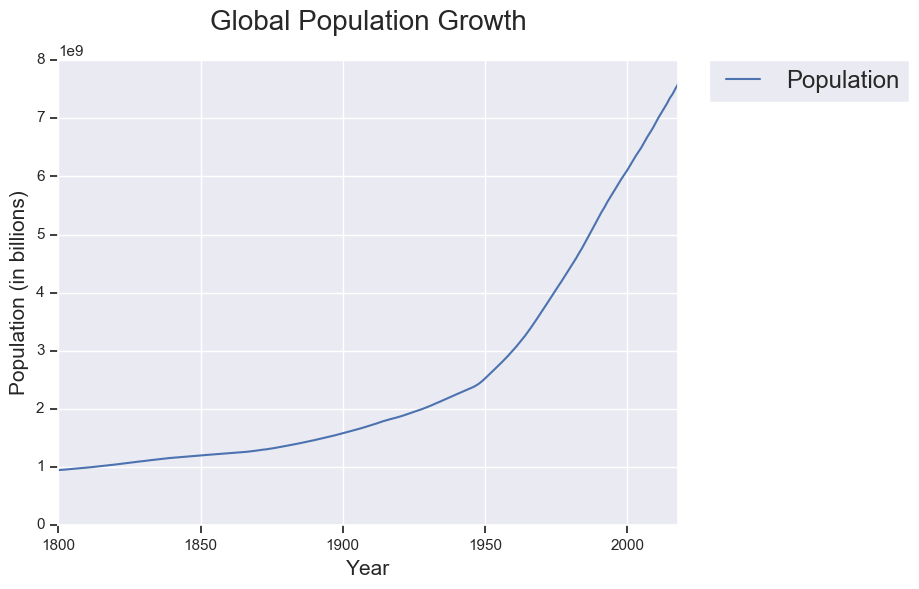

In [132]:
# set plot size
plt.subplots(figsize=(8,6));

# plot global population
fig = global_population.plot(kind='line');

# set legend,title and labels
plt.legend(['Population'],fontsize='x-large',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xlabel('Year',fontsize=15);
plt.ylabel('Population (in billions)',fontsize=15);
plt.title('Global Population Growth',fontsize=20);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

> **Observation:** we see that the global population is on a rising trend. Also, the rate of increase in population seems to be drastically rising from the year 1950

Let's now plot the population dataframe for all countries

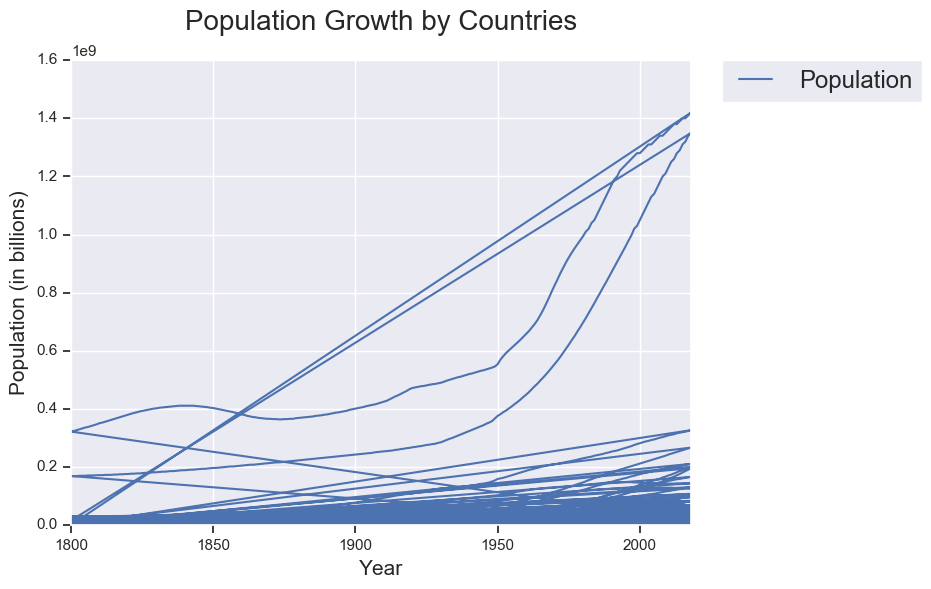

In [133]:
# plot population data for each country since 1800
fig = population_df.plot(x='year',y='population',kind='line',figsize=(8,6));

# set legend,title and labels
plt.legend(['Population'],fontsize='x-large',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xlabel('Year',fontsize=15);
plt.ylabel('Population (in billions)',fontsize=15);
plt.title('Population Growth by Countries',fontsize=20);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

>**Observation:** we are able to see that for few countries, the population is increasing drastically from the year 1950. Also, we are able to see that for some countries, the population seems to be decreasing

What we will do now, is create separate dataframes holding data for particular year. This will simplify the comparison for us

In [134]:
#*************************************************#
# get country population for specific years
#*************************************************#

# year: 1800
data_1800 = population_df[population_df.year==1800].loc[:,['country','population']].set_index('country')

# year: 1850
data_1850 = population_df[population_df.year==1850].loc[:,['country','population']].set_index('country')

# year: 1900
data_1900 = population_df[population_df.year==1900].loc[:,['country','population']].set_index('country')

# year: 1950
data_1950 = population_df[population_df.year==1950].loc[:,['country','population']].set_index('country')

# year: 2000
data_2000 = population_df[population_df.year==2000].loc[:,['country','population']].set_index('country')

In [135]:
# difference in population between 2000 & 1800
data_2000[(data_2000.population - data_1800.population)<0]

population
country             
Holy See         785
Ireland      3850000

In [136]:
# difference in population between 2000 & 1900
data_2000[(data_2000.population - data_1900.population)<0]

population
country             
Holy See         785

In [137]:
# difference in population between 1950 & 1800
data_1950[(data_1950.population - data_1800.population)<0]

population
country            
Ireland     2910000

In [138]:
# difference in population between 1900 & 1800
data_1900[(data_1900.population - data_1800.population)<0]

population
country                        
Antigua and Barbuda       34900
Fiji                     122000
Ghana                   1890000
Ireland                 3160000
Samoa                     34300
Zambia                   742000

From the above differences, we can see that countries - 'Holy See' and 'Ireland' seems to have decreasing population. Let us check them out

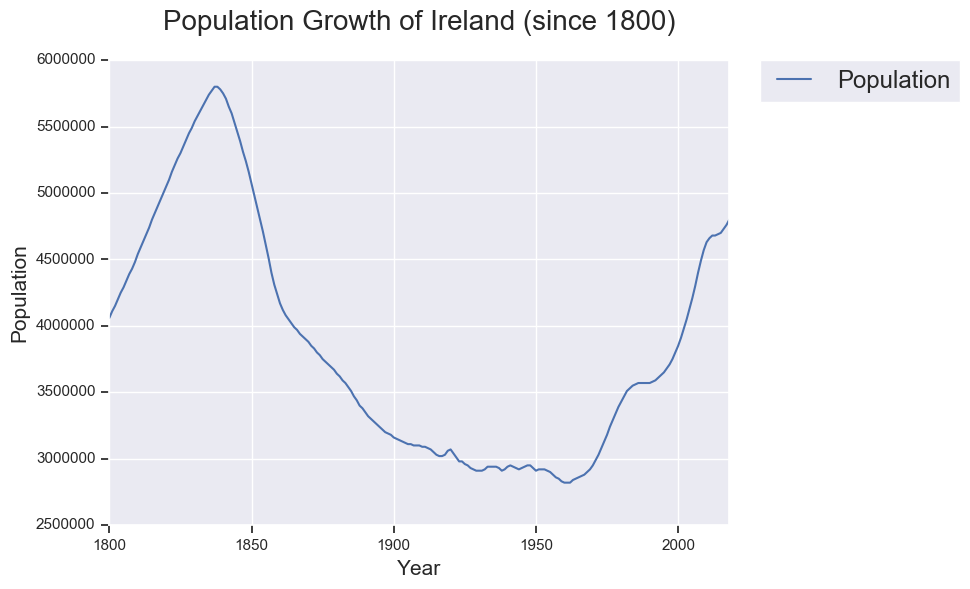

In [139]:
# plot 'Ireland' population data
fig = population_df[population_df.country == 'Ireland'].plot(x='year',y='population',kind='line',figsize=(8,6));

# set legend,title and labels
plt.legend(['Population'],fontsize='x-large',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xlabel('Year',fontsize=15);
plt.ylabel('Population',fontsize=15);
plt.title('Population Growth of Ireland (since 1800)',fontsize=20);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

'Ireland' seems to have decreased in population from around 1845 to 1960. After 1960, the population seems to be increasing. 

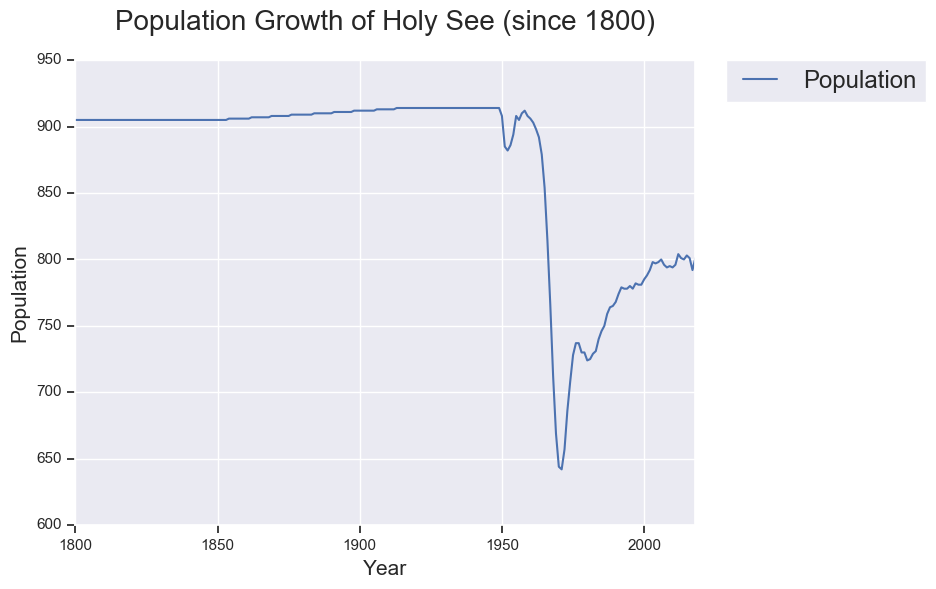

In [140]:
# plot 'Holy See' population data
fig = population_df[population_df.country == 'Holy See'].plot(x='year',y='population',kind='line',figsize=(8,6));

# set legend,title and labels
plt.legend(['Population'],fontsize='x-large',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xlabel('Year',fontsize=15);
plt.ylabel('Population',fontsize=15);
plt.title('Population Growth of Holy See (since 1800)',fontsize=20);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

'Holy See' has a sudden reduction in population after 1960 but is slowly recovering

In [141]:
# difference in population between 2000 & 1800
diff_population = data_2000 - data_1800

We are calculating the difference in population for each country between the years 2000 and 1800. This will give us population growth for each country over 2 centuries. We will sort them by value. This will give us the list of countries that are sorted by their population growth

In [142]:
# sort the difference dataset by population in descending order 
diff_population.sort_values('population',ascending=False,inplace=True)

# slice first 10 values in the dataset
diff_population[:10]

population
country                  
China           958000000
India           881000000
United States   275200000
Indonesia       195900000
Brazil          171360000
Pakistan        125900000
Russia          114900000
Bangladesh      112800000
Nigeria         109900000
Japan            97700000

This is the list of Top 10 countries ranked by their population growth. Let us plot them too!

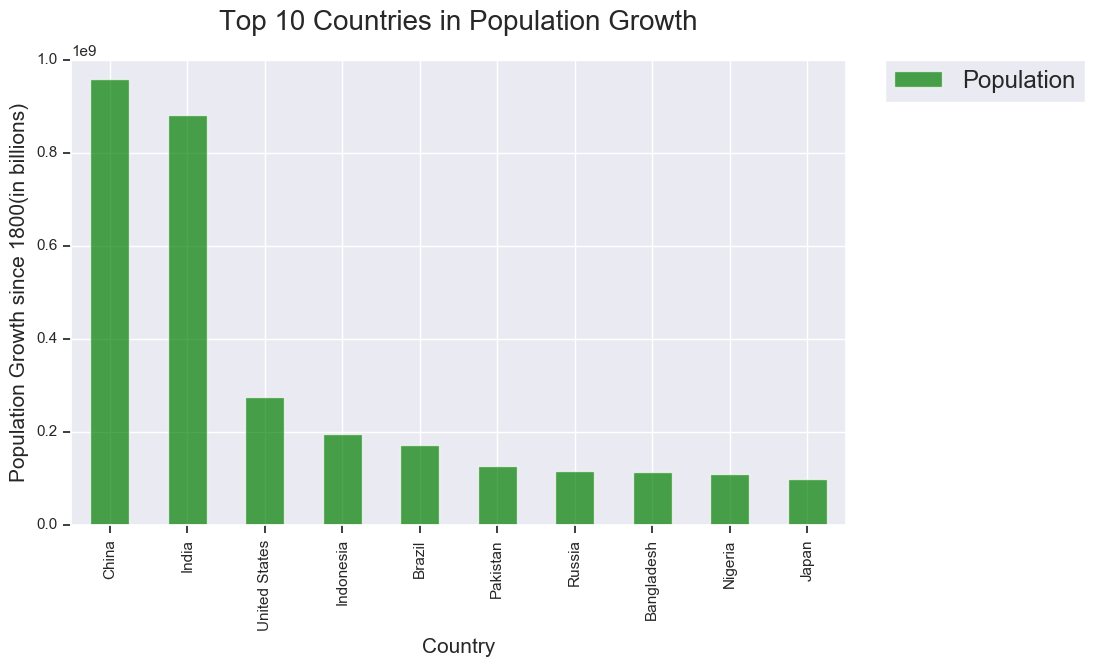

In [143]:
# plot top 10 countries by population growth
fig = diff_population[:10].plot(y='population',kind='bar',color='green',alpha=0.7,figsize=(10,6));

# set legend,title and labels
plt.legend(['Population'],fontsize='x-large',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xlabel('Country',fontsize=15);
plt.ylabel('Population Growth since 1800(in billions)',fontsize=15);
plt.title('Top 10 Countries in Population Growth',fontsize=20);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

>**Observation:** There seems to be a huge gap between rank 2(India) and rank 3(US)

We will now check, how these 10 countries have grown since 1800 by plotting their values

In [144]:
# get the total population data since 1800, for top 10 population growth countries
top_10_country = population_df[population_df.country.isin(diff_population.index[:10].tolist())]

In [145]:
top_10_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 2847 to 40952
Data columns (total 3 columns):
country       2190 non-null object
year          2190 non-null int64
population    2190 non-null int64
dtypes: int64(2), object(1)
memory usage: 68.4+ KB


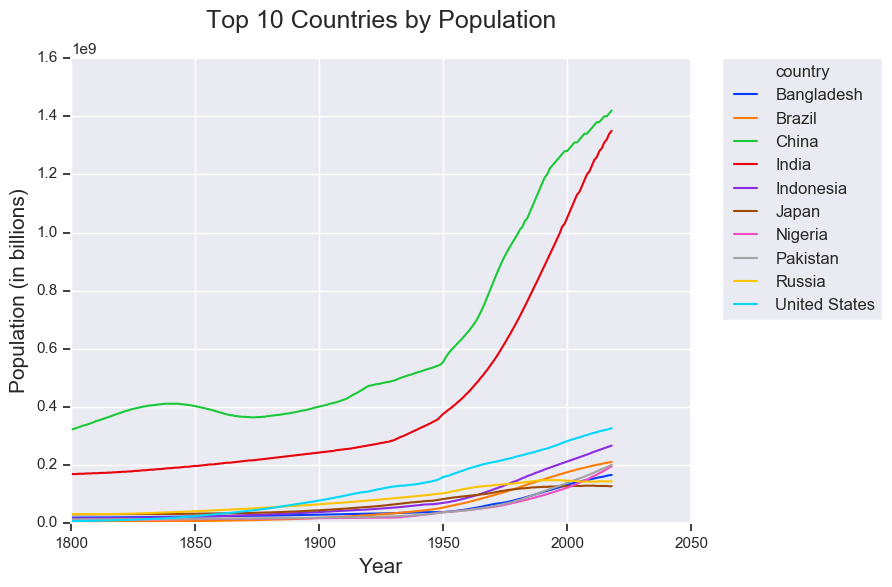

In [146]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend for top 10 population growth countries
fig = sns.lineplot(data=top_10_country,x='year',y='population', hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Population (in billions)',fontsize=15);
plt.title('Top 10 Countries by Population',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

>**Observation:** China and India seems to have exponential population growth since 1950. This data supports our initial observation that the rate of growth of global population has increased since 1950

Since we see a sudden change after 1950, let us check the countries growth between 1950 and 2000

In [147]:
# population difference between 1950 and 2000
diff_population = data_2000 - data_1950

In [148]:
diff_population.sort_values('population',ascending=False,inplace=True)
diff_population.head(10)

population
country                  
China           726000000
India           674000000
Indonesia       142500000
United States   123000000
Brazil          121000000
Pakistan        101500000
Bangladesh       94100000
Nigeria          84100000
Mexico           74000000
Philippines      59400000

>**Observation:** We can observe that United States and Indonesia have switched places. Also Russia and Japan are not in the top 10 list. Instead Mexico and Philippines have entered the top 10.

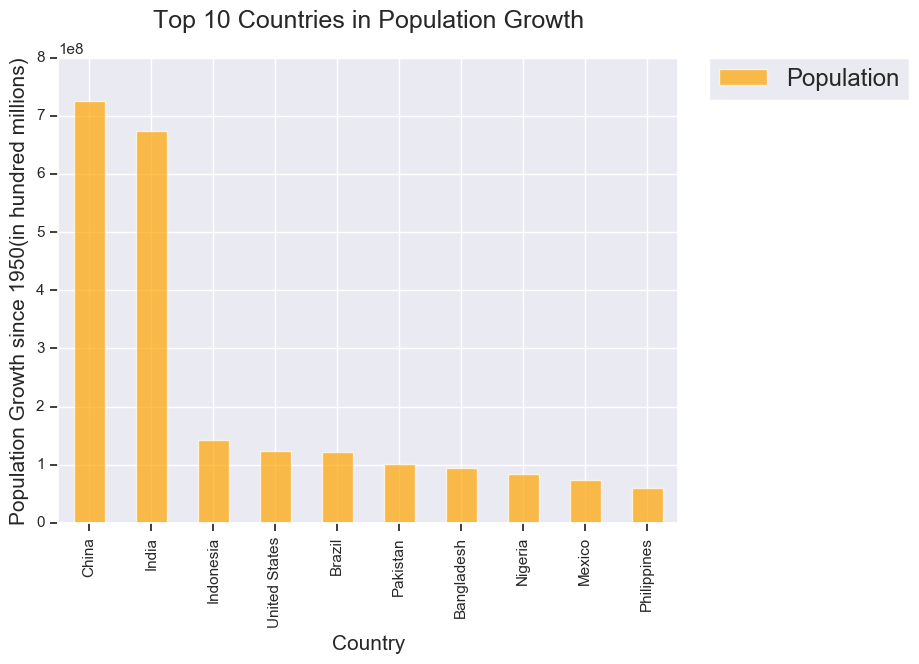

In [149]:
# plot top 10 population growth countries since 1950
fig = diff_population[:10].plot(y='population',kind='bar',color='orange',alpha=0.7,figsize=(8,6));

# set legend,label and title
plt.legend(['Population'],fontsize='x-large',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xlabel('Country',fontsize=15);
plt.ylabel('Population Growth since 1950(in hundred millions)',fontsize=15);
plt.title('Top 10 Countries in Population Growth',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

Let's also plot the population data for these countries in the latest list

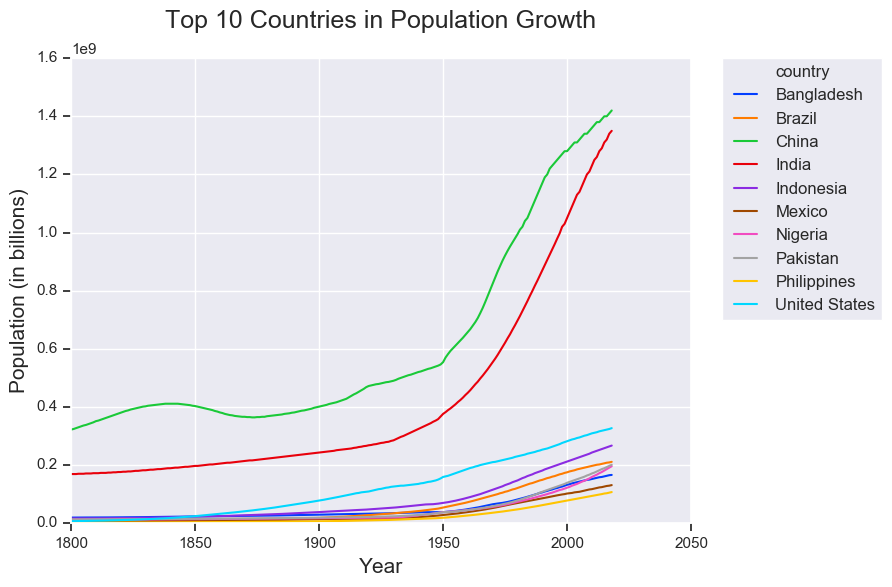

In [150]:
# get Total population data for the top 10 countries
top_10_country = population_df[population_df.country.isin(diff_population.index[:10].tolist())]

# set plot size
plt.subplots(figsize=(8,6));

# plot top 10 countries
fig = sns.lineplot(data=top_10_country,x='year',y='population', hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Population (in billions)',fontsize=15);
plt.title('Top 10 Countries in Population Growth',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

In [151]:
diff_population.tail()

population
country                        
Palau                     11760
Nauru                      7050
Tuvalu                     4250
Holy See                   -123
St. Kitts and Nevis        -600

We see that 'Holy See' and 'St. Kitts and Nevis' have negative values which show population decrease between 2000 and 1950. Since we've already seen 'Holy See', let's check 'St. Kitts and Nevis'

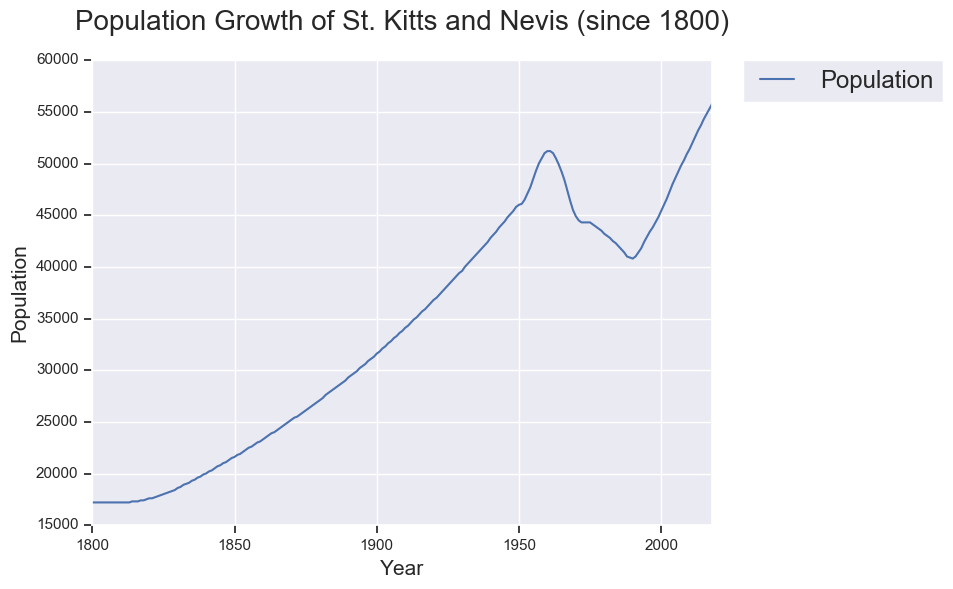

In [152]:
# plot 'Holy See' population data
fig = population_df[population_df.country == 'St. Kitts and Nevis'].plot(x='year',y='population',kind='line',figsize=(8,6));

# set legend,title and labels
plt.legend(['Population'],fontsize='x-large',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xlabel('Year',fontsize=15);
plt.ylabel('Population',fontsize=15);
plt.title('Population Growth of St. Kitts and Nevis (since 1800)',fontsize=20);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

'St. Kitts and Nevis' has population decrease from around 1960 till 2000. But from 2000, the population is on the rising trend

>#### Observation: The global population is on a rising trend. Individually, the trends of the countries also point the same.

### With change in population, how is migration pattern in world countries ?

We have seen that population is increasing. Our next question is related to spatial distribution of population. We need to identify if people are moving towards cities as population grows

In [153]:
# get minimum and maximum years from Urban Dataframe
print(urban_df.year.min())
print(urban_df.year.max())

1960
2016


In [154]:
#*************************************************#
# get country population for specific years
#*************************************************#

# year: 1960
data_1960 = urban_df[urban_df.year==1960].loc[:,['country','urban_population_percent']].set_index('country')

# year: 2016
data_2016 = urban_df[urban_df.year==2016].loc[:,['country','urban_population_percent']].set_index('country')

In [155]:
# population difference between 1960 and 2016
diff_urban_population = data_2016 - data_1960

In [156]:
data_2016.sort_values('urban_population_percent',ascending=False,inplace=True)
data_2016[:10]

urban_population_percent
country                             
Monaco                         100.0
Nauru                          100.0
Singapore                      100.0
Qatar                           99.3
Kuwait                          98.4
Belgium                         97.9
Malta                           95.5
Uruguay                         95.5
Iceland                         94.2
San Marino                      94.2

This gives us the top 10 countries ranked by urban migration of people. The data is for the year 2016. Looks like in Monaco, Nauru and Singapore the total population is living in urban areas!

In [157]:
diff_urban_population.sort_values('urban_population_percent',ascending=False,inplace=True)

In [158]:
diff_urban_population[:10]

urban_population_percent
country                                        
Gabon                                     70.00
Oman                                      61.70
South Korea                               54.90
Botswana                                  54.64
Mauritania                                53.52
Saudi Arabia                              52.00
Libya                                     51.50
Dominican Republic                        49.60
Cape Verde                                49.50
Sao Tome and Principe                     49.50

This is the list of top 10 countries ranked by urban population growth. Between 1960 and 2000, Gabon's urban population has grown from 17.4 to 87.4. It has the highest growth rate with a difference of 70. We will plot this data now.

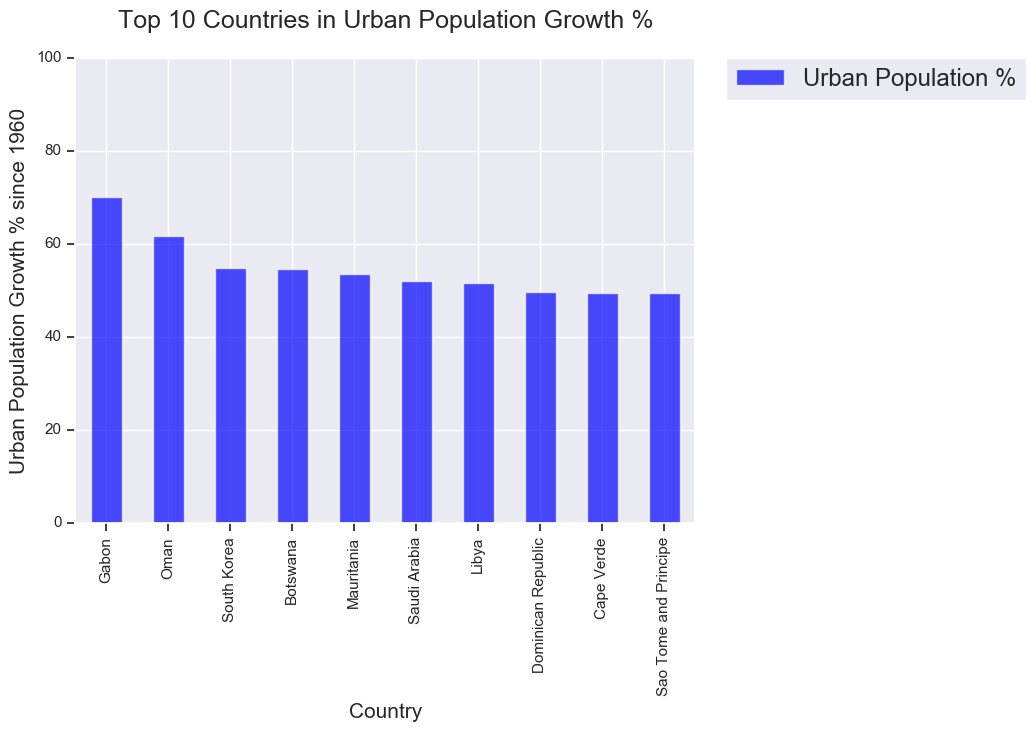

In [159]:
# plot top 10 population growth countries since 1950
fig = diff_urban_population[:10].plot(y='urban_population_percent',kind='bar',color='blue',
                                      alpha=0.7,ylim=(0,100),figsize=(8,6));

# set legend,label and title
plt.legend(['Urban Population %'],fontsize='x-large',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xlabel('Country',fontsize=15);
plt.ylabel('Urban Population Growth % since 1960',fontsize=15);
plt.title('Top 10 Countries in Urban Population Growth %',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

In [160]:
top_urban_country = diff_urban_population.index[:10].tolist()

We will plot the data for the top 10 countries by urban population growth % below

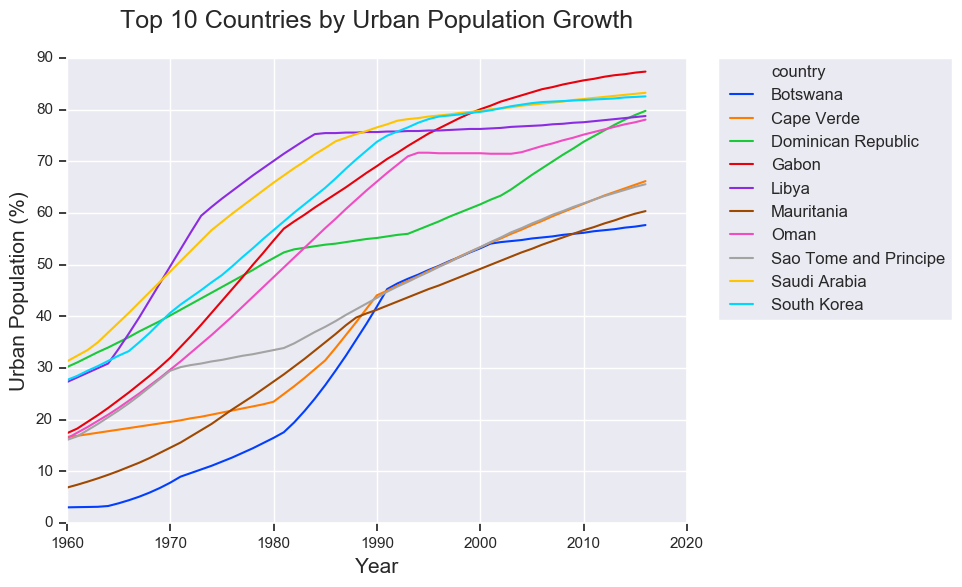

In [161]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend for top 10 population growth countries
fig = sns.lineplot(data=urban_df[urban_df.country.isin(top_urban_country)],x='year',y='urban_population_percent',
                   hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Urban Population (%)',fontsize=15);
plt.title('Top 10 Countries by Urban Population Growth',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

>**Observation:** The urban population growth % is on a rising trend for all the countries above

We will check the change/growth in total population using the population dataframe for the above countries

In [162]:
population_df[population_df.country=='South Korea'].max()

country       South Korea
year                 2018
population       51200000
dtype: object

In [163]:
population_df[population_df.country=='Saudi Arabia'].max()

country       Saudi Arabia
year                  2018
population        33600000
dtype: object

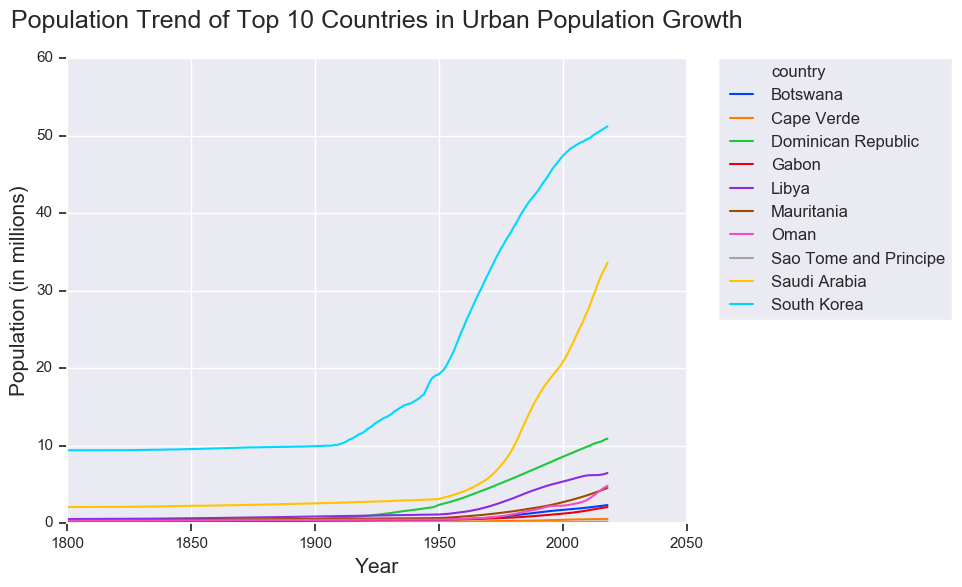

In [164]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend for top 10 population growth countries
fig = sns.lineplot(data=population_df[population_df.country.isin(top_urban_country)],x='year',y='population',
                   hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Population (in millions)',fontsize=15);
plt.title('Population Trend of Top 10 Countries in Urban Population Growth',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# set y tick-labels
fig.set_yticklabels([0,10,20,30,40,50,60]);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

>**Observation:** Although 'South Korea' and 'Saudi Arabia' have rapid increase in population, their urban population growth does not reflect the same growth pattern.

From the above difference dataset we can also see some countries with negative values. We will take a look into them now.

In [165]:
decreasing_urban_list = diff_urban_population[diff_urban_population.urban_population_percent<0].index.tolist()
decreasing_urban_list

['Guyana',
 'St. Lucia',
 'Barbados',
 'Liechtenstein',
 'Tajikistan',
 'Trinidad and Tobago',
 'Belize',
 'Antigua and Barbuda']

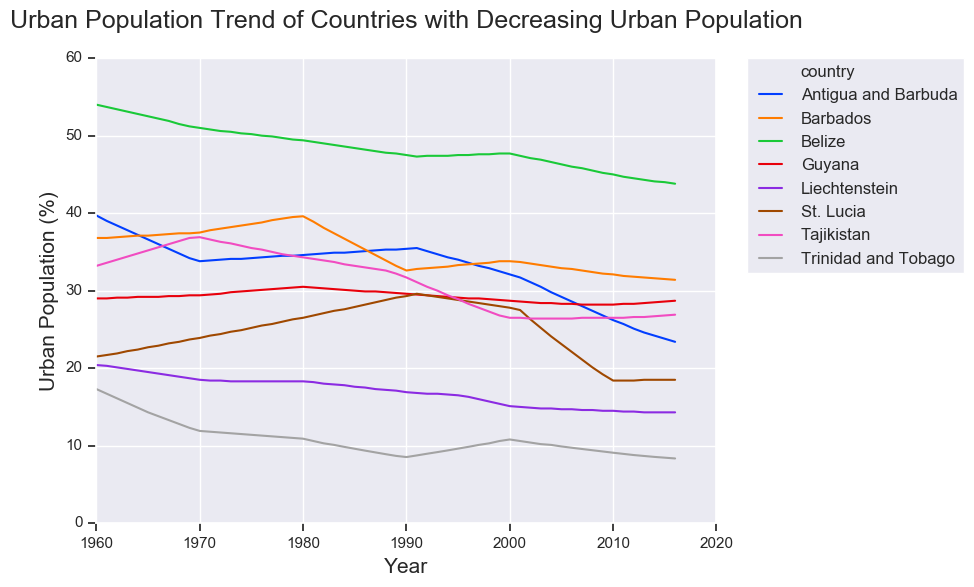

In [166]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend for countries with decreasing urban population
fig = sns.lineplot(data=urban_df[urban_df.country.isin(decreasing_urban_list)],x='year',y='urban_population_percent',
                   hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Urban Population (%)',fontsize=15);
plt.title('Urban Population Trend of Countries with Decreasing Urban Population',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

These countries have a decreasing urban population percent. May be people are leaving the country? We need to check in population dataframe

In [167]:
population_df[population_df.country == 'Tajikistan'].max()

country       Tajikistan
year                2018
population       9110000
dtype: object

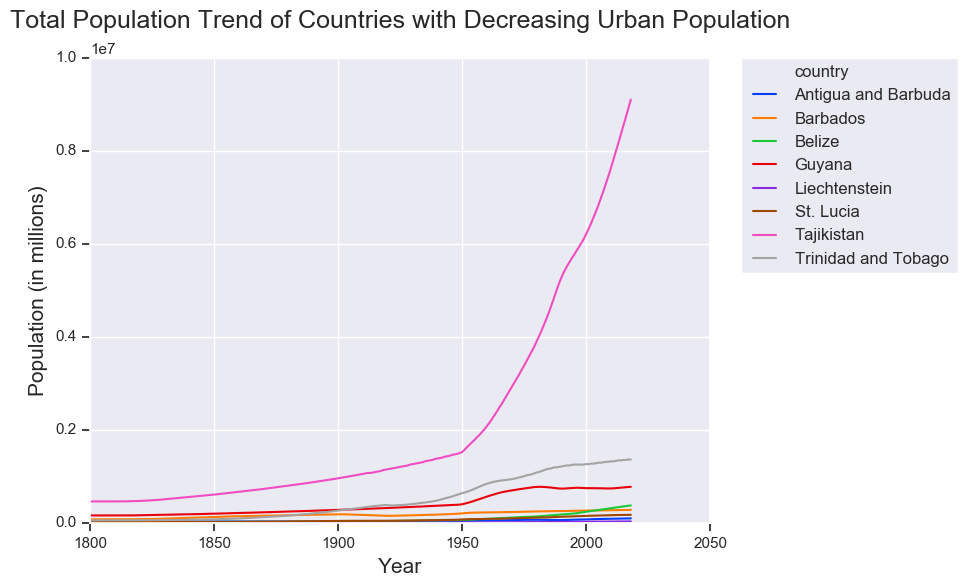

In [168]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend for countries with decreasing urban population
fig = sns.lineplot(data=population_df[population_df.country.isin(decreasing_urban_list)],x='year',y='population',
                   hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Population (in millions)',fontsize=15);
plt.title('Total Population Trend of Countries with Decreasing Urban Population',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

>**Observation:** Here we see that the countries with decreasing urban population, have an increasing total population.

Seems we are wrong in assuming people are leaving the country! NO! -That is surprising!!

Let's checkout how urban growth is in the top 10 countries by total population

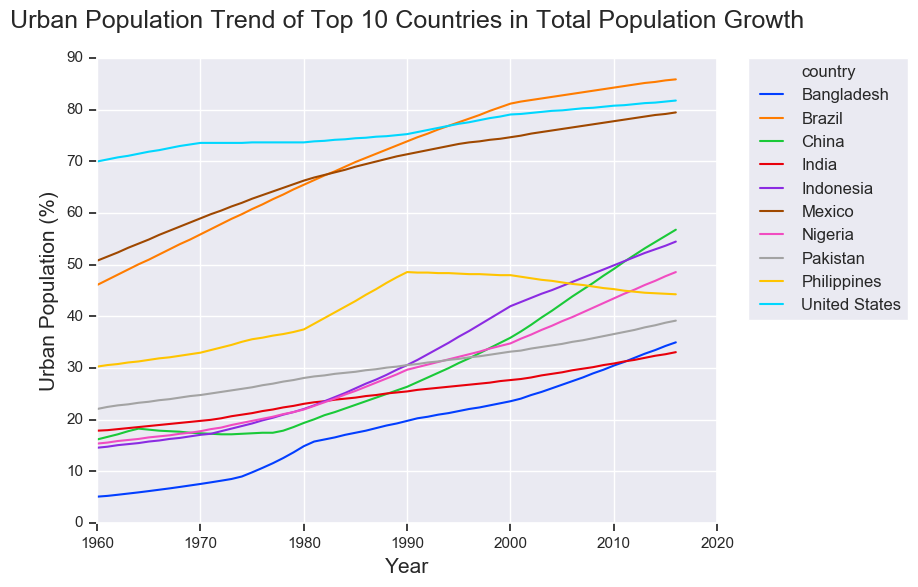

In [169]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend for countries with decreasing urban population
fig = sns.lineplot(data=urban_df[urban_df.country.isin(diff_population.index[:10].tolist())],
                   x='year',y='urban_population_percent',
                   hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Urban Population (%)',fontsize=15);
plt.title('Urban Population Trend of Top 10 Countries in Total Population Growth',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

Except for 'Philippines', the countries seem to have an increasing urban growth %

>#### Observation: Increase in Total Population of the country does not require increase in Urban Population. The relation between these two is less

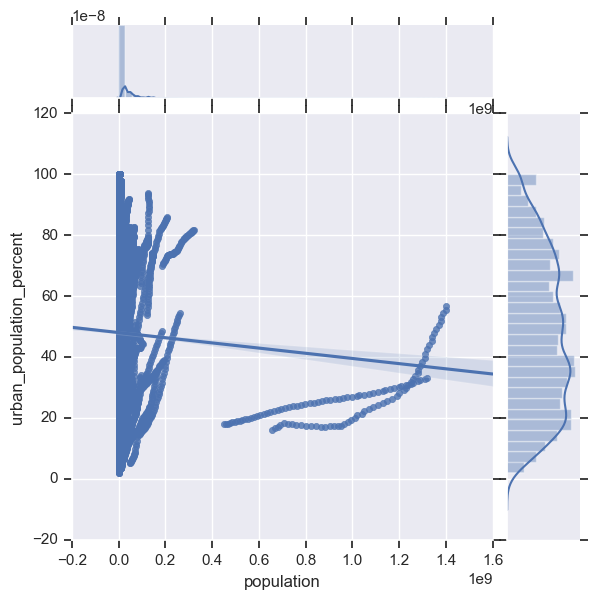

In [170]:
fig = sns.jointplot(data=data_set, x = 'population', y = 'urban_population_percent',kind='reg');

> This seems to prove our observation! There is no correlation between Total Population and Urban Population

### With the change in population, what is the change in birth rate and death rate?

Whew! Now to the next step. Is population growth related to change in birth and death rates? are they correlated in some way? Come on. Let's checkout.

In [171]:
# get minimum and maximum years from Birth Rate Dataframe
print(birth_rate_df.year.min())
print(birth_rate_df.year.max())

1800
2015


In [172]:
#*************************************************#
# get birth rate for specific years
#*************************************************#

# year: 1800
data_1800 = birth_rate_df[birth_rate_df.year==1800].loc[:,['country','crude_birth_rate']].set_index('country')

# year: 2015
data_2015 = birth_rate_df[birth_rate_df.year==2015].loc[:,['country','crude_birth_rate']].set_index('country')

In [173]:
data_2015.sort_values('crude_birth_rate',ascending=False,inplace=True)

In [174]:
data_2015[:10]

crude_birth_rate
country                           
Niger                         49.2
Angola                        45.0
Chad                          44.8
Burundi                       43.5
Somalia                       43.4
Mali                          42.9
Uganda                        42.5
Gambia                        41.7
Congo, Dem. Rep.              41.5
Zambia                        39.7

These are the top 10 countries by crude birth rate. The data is for the year 2015.

We will now find the difference of crude birth rates between 2015 and 1800 for each country

In [175]:
# birth rate difference between 1800 and 2000
diff_birth_rate = data_2015 - data_1800

In [176]:
diff_birth_rate.sort_values('crude_birth_rate',ascending=False,inplace=True)

In [177]:
diff_birth_rate[:10]

crude_birth_rate
country                           
Chad                           2.6
Niger                          2.1
Congo, Dem. Rep.              -0.2
Mali                          -0.4
Senegal                       -2.4
Burkina Faso                  -2.5
Cameroon                      -2.7
Angola                        -2.7
Gambia                        -3.3
Benin                         -3.3

Surprising! Other than 'Chad' and 'Niger', all other countries have a negative birth rate?!
This means that crude birth rate has been decreasing since 1800!

In [178]:
diff_birth_rate[diff_birth_rate.crude_birth_rate>0]

crude_birth_rate
country                  
Chad                  2.6
Niger                 2.1

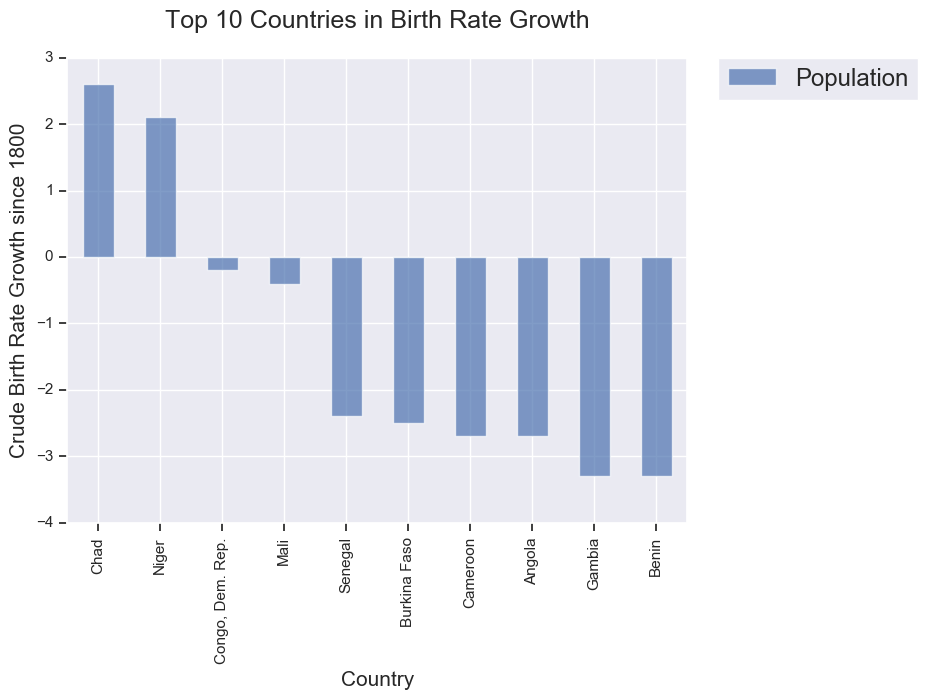

In [179]:
# plot top 10 population growth countries since 1950
fig = diff_birth_rate[:10].plot(kind='bar',alpha=0.7,figsize=(8,6));

# set legend,label and title
plt.legend(['Population'],fontsize='x-large',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xlabel('Country',fontsize=15);
plt.ylabel('Crude Birth Rate Growth since 1800',fontsize=15);
plt.title('Top 10 Countries in Birth Rate Growth',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

In [180]:
birth_rate_country = diff_birth_rate[:10].index.tolist()
birth_rate_country

['Chad',
 'Niger',
 'Congo, Dem. Rep.',
 'Mali',
 'Senegal',
 'Burkina Faso',
 'Cameroon',
 'Angola',
 'Gambia',
 'Benin']

These are the top 10 countries by crude_birth_rate growth. We will try to plot their population growth from population dataframe

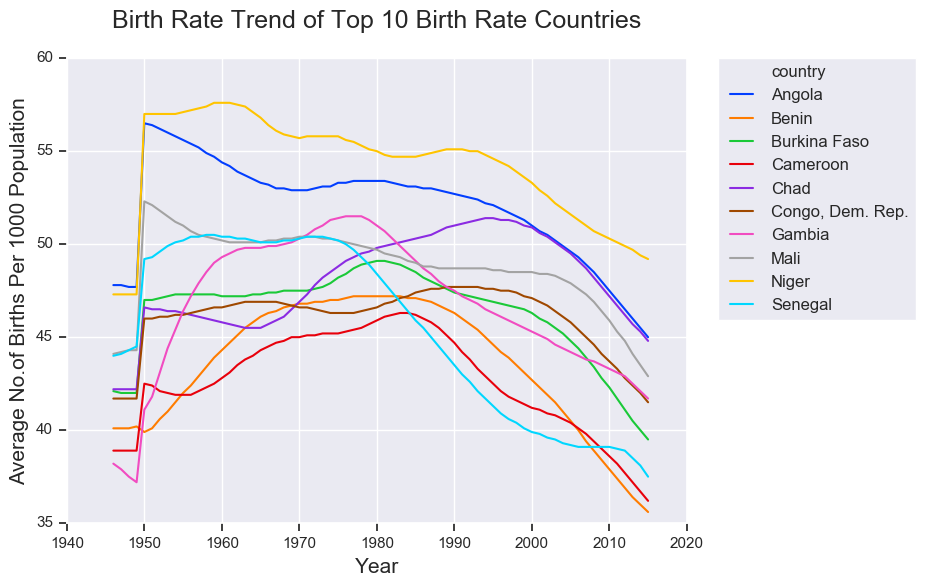

In [181]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend for top 10 birth rate countries
fig = sns.lineplot(data=birth_rate_df[(birth_rate_df.country.isin(birth_rate_country))& (birth_rate_df.year>1945)],
                   x='year',y='crude_birth_rate', hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Average No.of Births Per 1000 Population',fontsize=15);
plt.title('Birth Rate Trend of Top 10 Birth Rate Countries',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

In [182]:
population_df[population_df.country=='Congo, Dem. Rep.'].max()

country       Congo, Dem. Rep.
year                      2018
population            84000000
dtype: object

In [183]:
population_df[population_df.country=='China'].max()

country            China
year                2018
population    1420000000
dtype: object

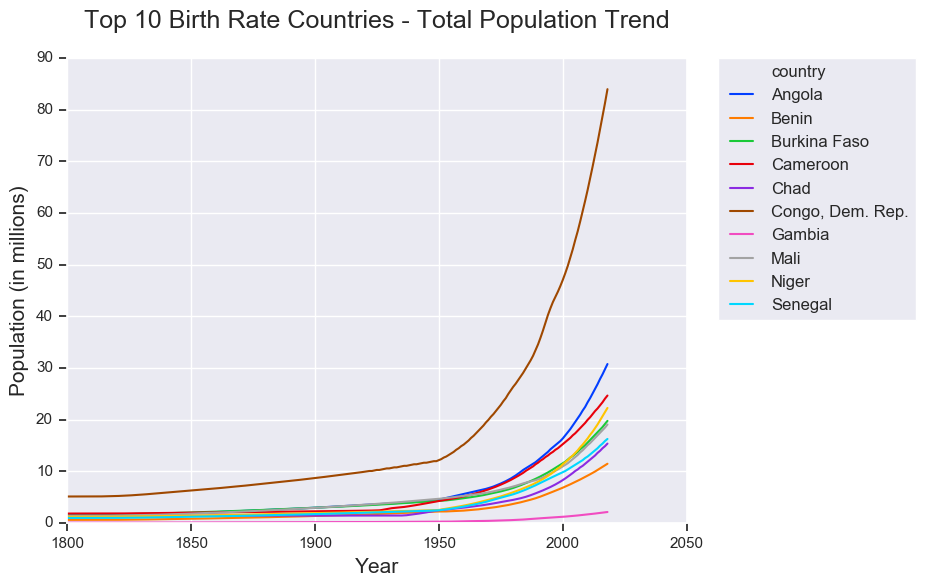

In [184]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend for top 10 birth rate countries
fig = sns.lineplot(data=population_df[population_df.country.isin(birth_rate_country)],
                   x='year',y='population', hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Population (in millions)',fontsize=15);
plt.title('Top 10 Birth Rate Countries - Total Population Trend',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# set y tick-labels
fig.set_yticklabels([0,10,20,30,40,50,60,70,80,90]);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

Oh..! Although these countries have a rising trend in population, their birth_rate seems to be dropping. Which means less children are born. Number of births is reducing! Hmmm...

>**Observation:** crude_birth_rate is on a down trend for most of the countries!

We need to check how our top 10 population countries do in birth_rate.

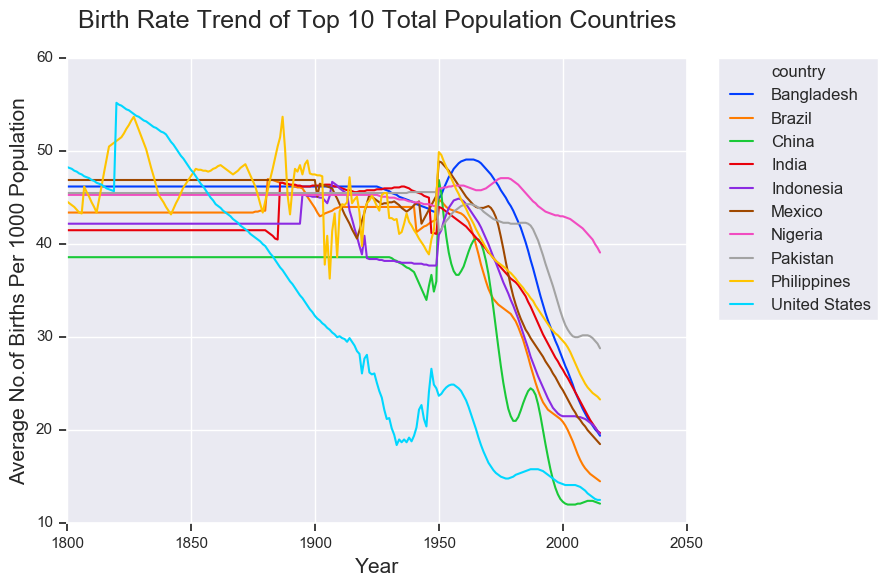

In [185]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend for top 10 birth rate countries
fig = sns.lineplot(data=birth_rate_df[birth_rate_df.country.isin(diff_population.index[:10].tolist())],
                   x='year',y='crude_birth_rate', hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Average No.of Births Per 1000 Population',fontsize=15);
plt.title('Birth Rate Trend of Top 10 Total Population Countries',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

Even our top 10 countries by population have a down trend! We'll plot the difference in birth rate for these countries using our difference dataset.

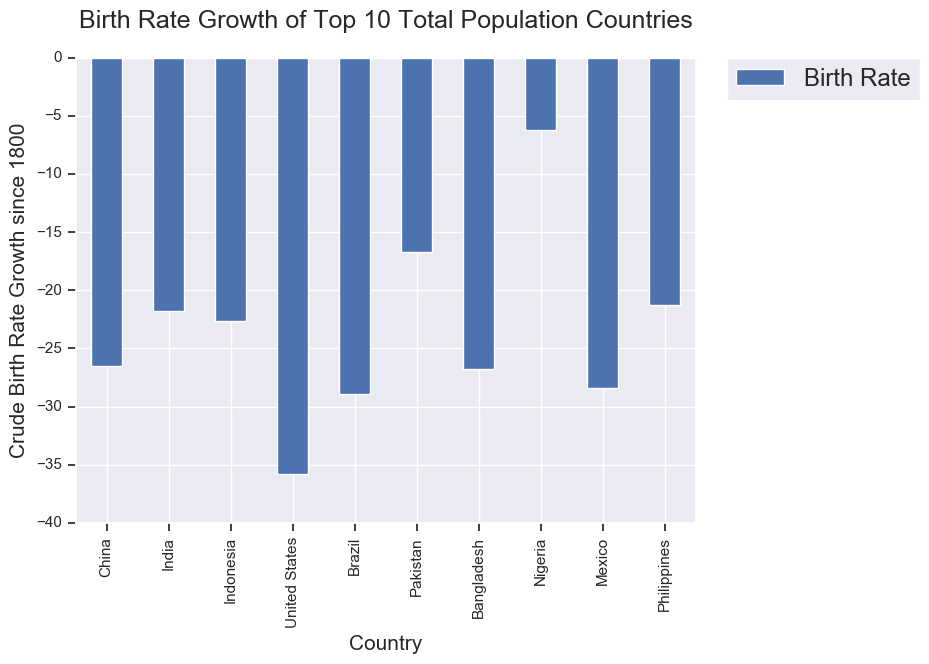

In [186]:
# plot top 10 population growth countries since 1950
fig = diff_birth_rate.loc[diff_population.index[:10].tolist()].plot(kind='bar',figsize=(8,6));

# set legend,label and title
plt.legend(['Birth Rate'],fontsize='x-large',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xlabel('Country',fontsize=15);
plt.ylabel('Crude Birth Rate Growth since 1800',fontsize=15);
plt.title('Birth Rate Growth of Top 10 Total Population Countries',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

United States has the highest change. birth_rate has reduced by a value of 35!

>#### Observation: Most of the countries of the world have a down trend in birth_rate


Then what is causing the population rise? If birth rate is indeed reducing, how can population increase? is it because less people die now-a-days? Maybe! We have the data. That should help us.

#### DEATH RATE

In [187]:
# get minimum and maximum years from Death Rate Dataframe
print(death_rate_df.year.min())
print(death_rate_df.year.max())

1950
2099


In [188]:
#*************************************************#
# get death rate for specific years
#*************************************************#

# year: 1950
data_1950 = death_rate_df[death_rate_df.year==1950].loc[:,['country','crude_death_rate']].set_index('country')

# year: 2018
data_2018 = death_rate_df[death_rate_df.year==2018].loc[:,['country','crude_death_rate']].set_index('country')

In [189]:
data_2018.sort_values('crude_death_rate',ascending=False,inplace=True)

In [190]:
data_2018[-10:]

crude_death_rate
country                               
Jordan                            3.83
Brunei                            3.71
Saudi Arabia                      3.62
Palestine                         3.47
Maldives                          3.27
Kuwait                            2.89
Oman                              2.47
Bahrain                           2.39
United Arab Emirates              1.68
Qatar                             1.60

These guys above, have the least death rate - meaning - the number of people dying per 1000 is very less! They're the top 10 in our list. The data is for the year 2018.

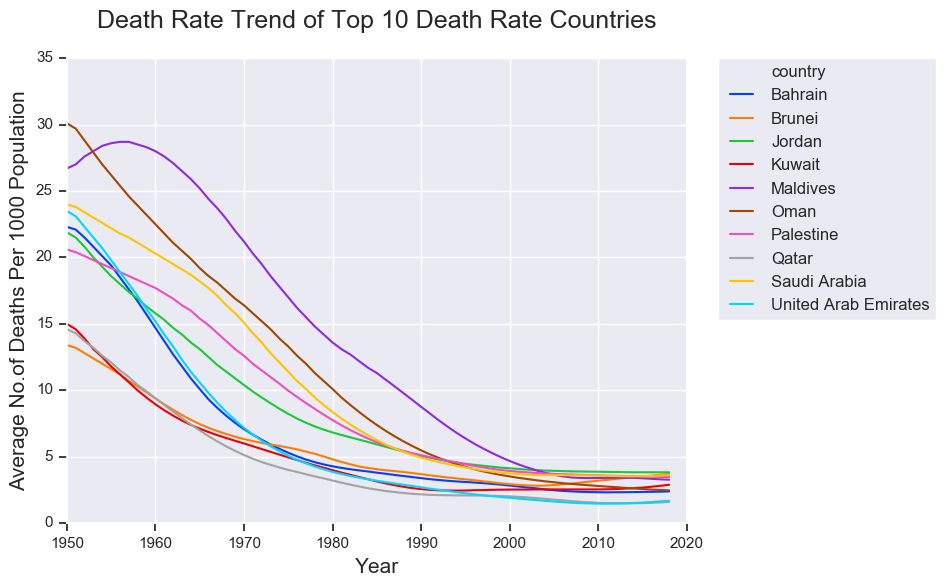

In [191]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend for top 10 death rate countries
fig = sns.lineplot(data=death_rate_df[death_rate_df.country.isin(data_2018[-10:].index.tolist())
                                      & (death_rate_df.year<2019)],
                   x='year',y='crude_death_rate',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Average No.of Deaths Per 1000 Population',fontsize=15);
plt.title('Death Rate Trend of Top 10 Death Rate Countries',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

Wow! They're having drastic decrease in death rate. **'Oman'** went from 30 to 5 in 40 years! How does their total population look like?

In [192]:
population_df[population_df.country=='Saudi Arabia'].max()

country       Saudi Arabia
year                  2018
population        33600000
dtype: object

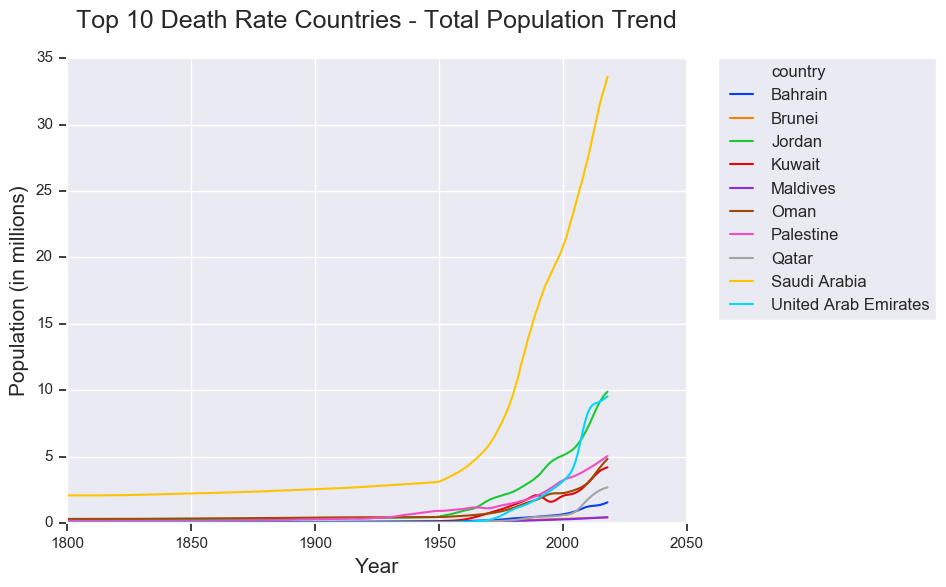

In [193]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend for top 10 death rate countries
fig = sns.lineplot(data=population_df[population_df.country.isin(data_2018[-10:].index.tolist())],
                   x='year',y='population',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Population (in millions)',fontsize=15);
plt.title('Top 10 Death Rate Countries - Total Population Trend',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);
fig.set_yticklabels([0,5,10,15,20,25,30,35]);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

There you go! Now we know why population increases. It is partly due to new birth, but majorly due to decrease in death rate. People are trying to cheat death! Attain immortality! and now...this is the outcome, thanks to improved medical facilities(smile)

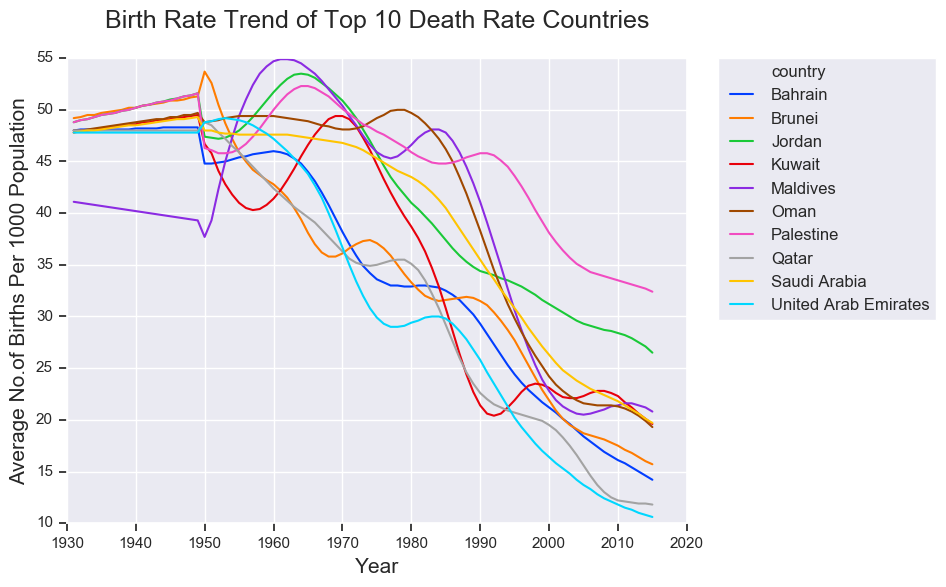

In [194]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend for top 10 death rate countries
fig = sns.lineplot(data=birth_rate_df[birth_rate_df.country.isin(data_2018[-10:].index.tolist())
                                      & (birth_rate_df.year>1930)],
                   x='year',y='crude_birth_rate',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Average No.of Births Per 1000 Population',fontsize=15);
plt.title('Birth Rate Trend of Top 10 Death Rate Countries',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

This is the birth rate trend for the top countries in death rate. Proves our point!

Now, lets check how the countries have grown in death rate between 1950 and 2018

In [195]:
# population difference between 1950 and 2018
diff_death_rate = data_2018 - data_1950

In [196]:
diff_death_rate.sort_values('crude_death_rate',ascending=False,inplace=True)
diff_death_rate[:10]

crude_death_rate
country                      
Bulgaria                 4.50
Romania                  2.40
Ukraine                  2.20
Latvia                   2.00
Greece                   1.44
Russia                   1.40
Netherlands              1.22
Japan                    1.11
Hungary                  1.10
Lithuania                0.60

Wait!

These countries have increasing death rate between 1950 and 2018?!

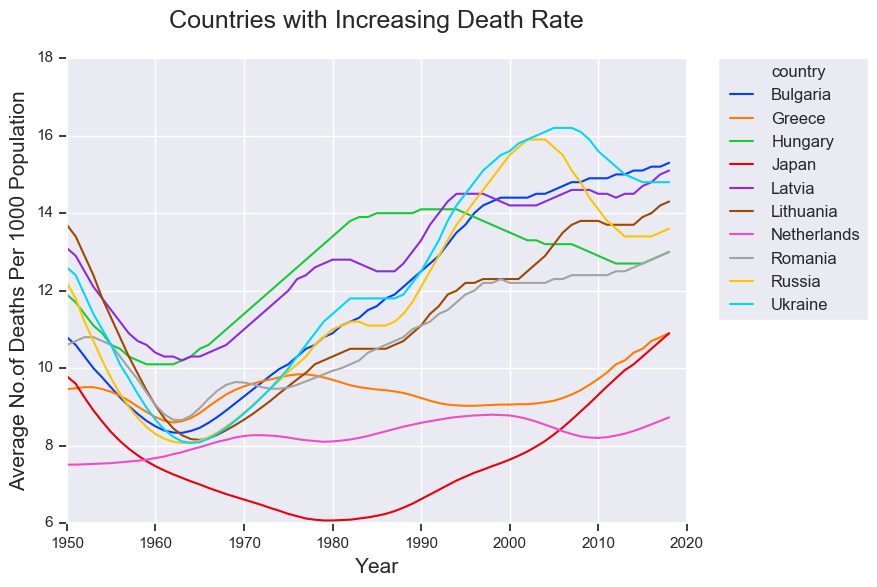

In [197]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=death_rate_df[death_rate_df.country.isin(diff_death_rate[:10].index.tolist())
                                      & (death_rate_df.year<2019)],
                   x='year',y='crude_death_rate',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Average No.of Deaths Per 1000 Population',fontsize=15);
plt.title('Countries with Increasing Death Rate',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

Surprisingly, YES! These countries have an increasing death rate. We need to know how is their birth rate and population growth.

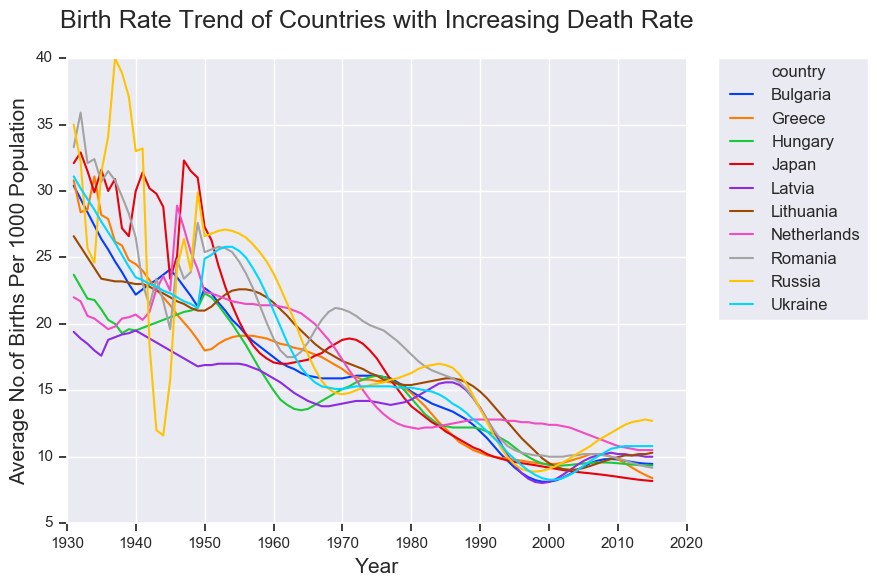

In [198]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=birth_rate_df[birth_rate_df.country.isin(diff_death_rate[:10].index.tolist())
                                      & (birth_rate_df.year>1930)],
                   x='year',y='crude_birth_rate',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Average No.of Births Per 1000 Population',fontsize=15);
plt.title('Birth Rate Trend of Countries with Increasing Death Rate',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

In [199]:
population_df[population_df.country=='Russia'].max()

country          Russia
year               2018
population    148000000
dtype: object

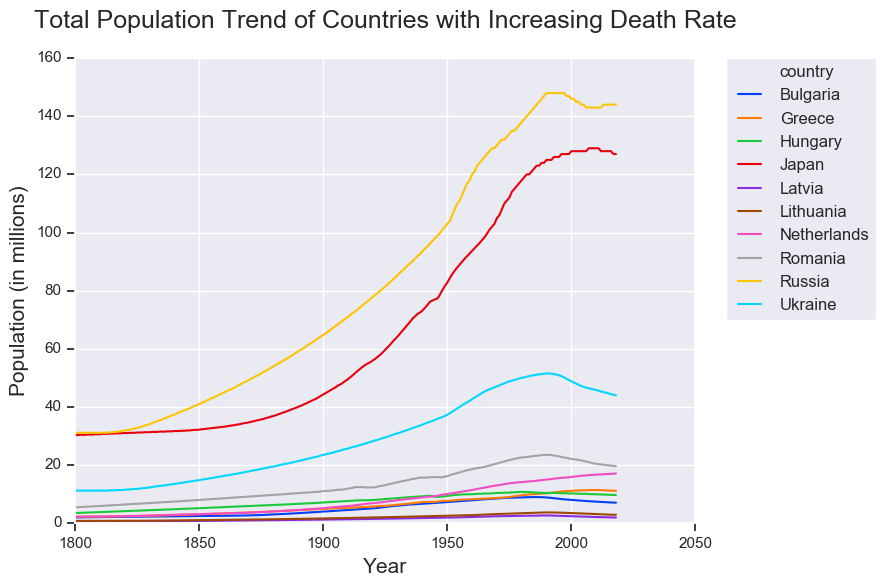

In [200]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=population_df[population_df.country.isin(diff_death_rate[:10].index.tolist())],
                   x='year',y='population',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Population (in millions)',fontsize=15);
plt.title('Total Population Trend of Countries with Increasing Death Rate',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);
fig.set_yticklabels([0,20,40,60,80,100,120,140,160]);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

Their birth rate is in a down trend. Also except for 'Russia','Japan' and 'Ukraine' all other countries have a fairly linear graph. Looks correct. Since more people die, the population rise is not that spectacular.

However, 'Russia' and 'Japan' have a drastic increase in population but their death rate is increasing and birth rate is decresing. This is strange. More people die, less people are born but population increases?

Maybe, because people from other countries are moving in. We cannot be sure, but maybe!

In [201]:
diff_death_rate[-10:]

crude_death_rate
country                      
Guinea                 -25.56
Bhutan                 -26.00
Iraq                   -26.81
Angola                 -27.16
Oman                   -27.63
Benin                  -27.71
South Sudan            -28.60
Timor-Leste            -30.48
Mali                   -30.53
Afghanistan            -31.86

These are our top 10 countries with drastic reduction in death rate! let's plot them.[whisper: **OMAN** is in the list]

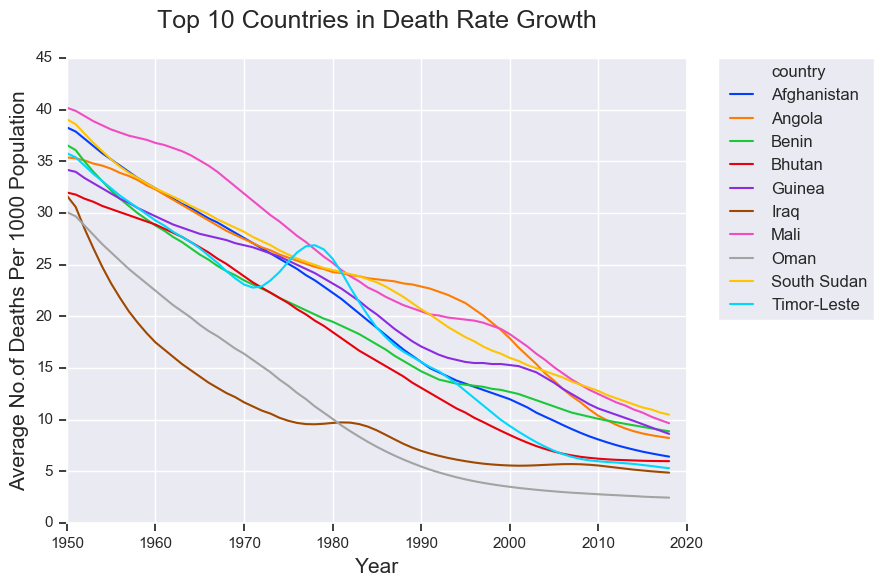

In [202]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=death_rate_df[death_rate_df.country.isin(diff_death_rate[-10:].index.tolist())
                                      & (death_rate_df.year<2019)],
                   x='year',y='crude_death_rate',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Average No.of Deaths Per 1000 Population',fontsize=15);
plt.title('Top 10 Countries in Death Rate Growth',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

That is good. It is surprising that top world countries like US, UK or European countries are not in the top list. But most of the countries found here are Middle-East or Eastern countries. Seems, they got a lot of help from Western countries. Let's also check their birth rate and total population growth

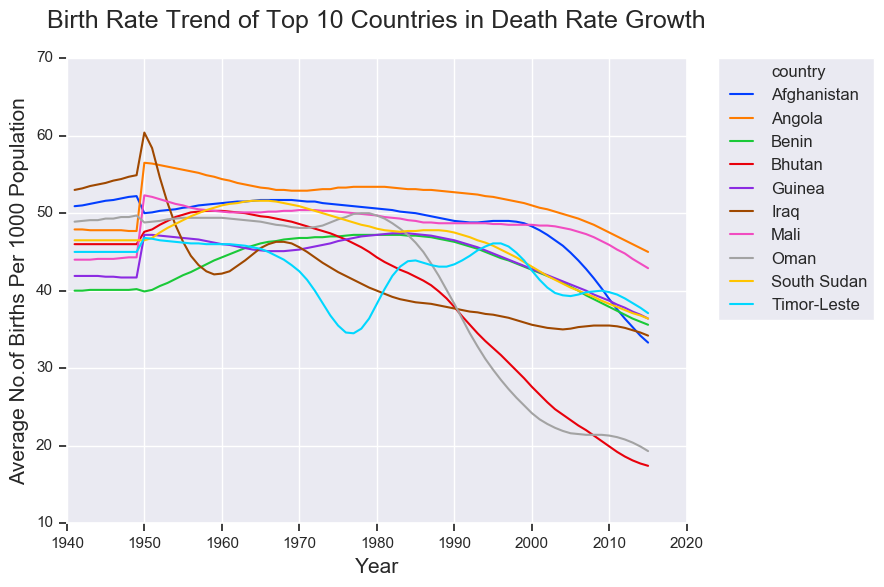

In [203]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=birth_rate_df[birth_rate_df.country.isin(diff_death_rate[-10:].index.tolist())
                                      & (birth_rate_df.year>1940)],
                   x='year',y='crude_birth_rate',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Average No.of Births Per 1000 Population',fontsize=15);
plt.title('Birth Rate Trend of Top 10 Countries in Death Rate Growth',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

We can see that the reduction in death rate is greater than the reduction in birth rate in these countries, which results in increased population as seen below

In [204]:
population_df[population_df.country=='Iraq'].max()

country           Iraq
year              2018
population    39300000
dtype: object

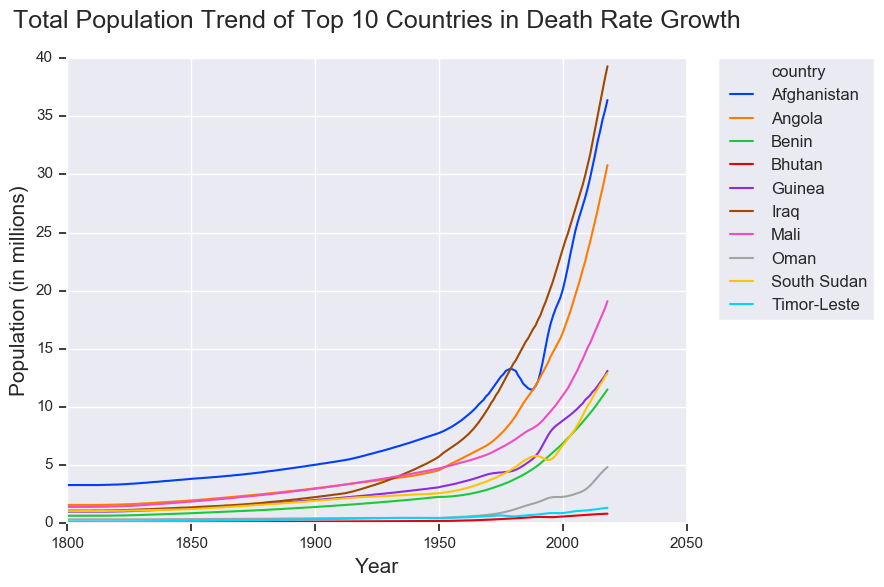

In [205]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=population_df[population_df.country.isin(diff_death_rate[-10:].index.tolist())],
                   x='year',y='population',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Population (in millions)',fontsize=15);
plt.title('Total Population Trend of Top 10 Countries in Death Rate Growth',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);
fig.set_yticklabels([0,5,10,15,20,25,30,35,40]);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

**'Iraq'** has less reduction in birth rate, there in proportionally increased population. **'Timor-Leste'** has high reduction in birth rate, and proportionally the population stays same even with decreased death.

Let's not forget our top 10 population countries! We'll see their death rate now.

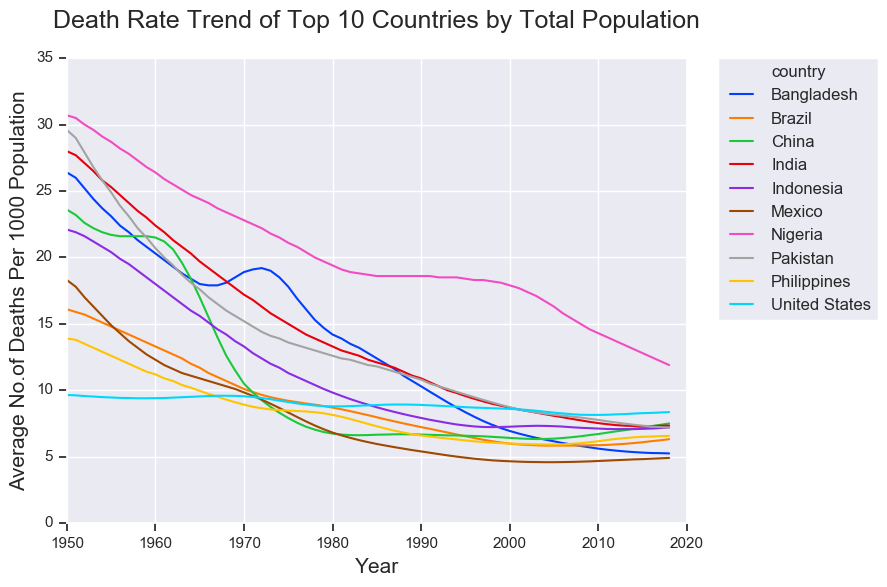

In [206]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=death_rate_df[death_rate_df.country.isin(diff_population.index[:10].tolist())
                                      & (death_rate_df.year<2019)],
                   x='year',y='crude_death_rate',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Average No.of Deaths Per 1000 Population',fontsize=15);
plt.title('Death Rate Trend of Top 10 Countries by Total Population',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

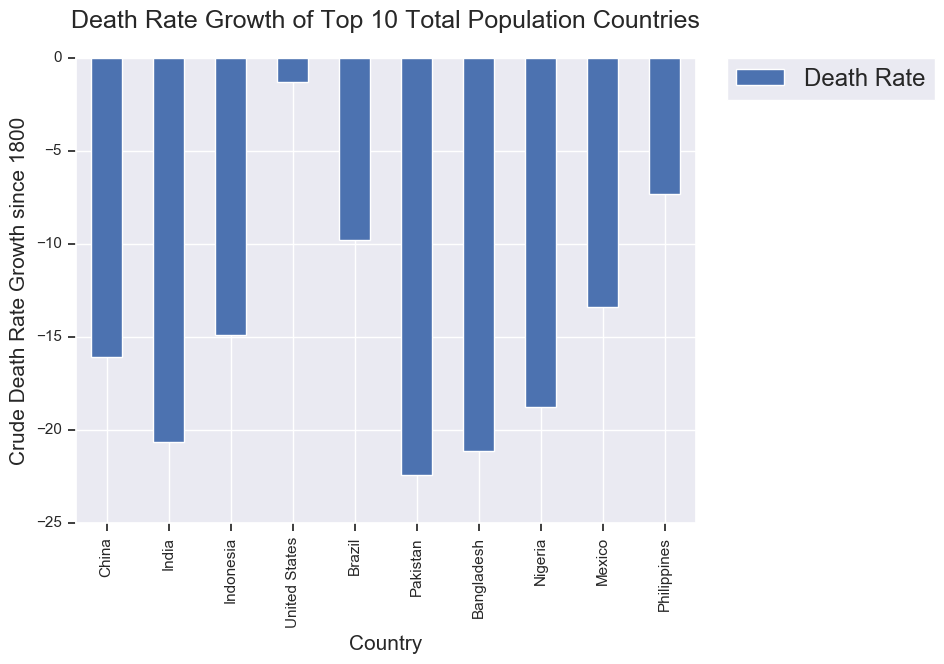

In [207]:
# plot top 10 population growth countries since 1950
fig = diff_death_rate.loc[diff_population.index[:10].tolist()].plot(kind='bar',figsize=(8,6));

# set legend,label and title
plt.legend(['Death Rate'],fontsize='x-large',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xlabel('Country',fontsize=15);
plt.ylabel('Crude Death Rate Growth since 1800',fontsize=15);
plt.title('Death Rate Growth of Top 10 Total Population Countries',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

As expected, their death rate is decresing drastically. Especially for 'Pakistan','Bangladesh' and 'India'.

> #### Observation: Increase in population in various countries inspite of decreased number of births is due to rapid decrease in death rate

### With increase in population, how much has the country increased in human development?

The 'Human Development Index' helps us rank countries based on 'Human Development'. The Index is based on Health, Education & Living Standard.

In [208]:
# get minimum and maximum years from Human Development Dataframe
print(human_development_df.year.min())
print(human_development_df.year.max())

1990
2015


In [209]:
#*************************************************#
# get human development for specific years
#*************************************************#

# year: 1990
data_1990 = human_development_df[human_development_df.year==1990].loc[:,['country','human_development_index']
                                                                     ].set_index('country')

# year: 2015
data_2015 = human_development_df[human_development_df.year==2015].loc[:,['country','human_development_index']
                                                                     ].set_index('country')

In [210]:
data_2015.sort_values('human_development_index',ascending=False,inplace=True)
data_2015[:10]

human_development_index
country                             
Norway                         0.949
Switzerland                    0.939
Australia                      0.939
Germany                        0.926
Singapore                      0.925
Denmark                        0.925
Netherlands                    0.924
Ireland                        0.923
Iceland                        0.921
Canada                         0.920

These are the top countries by HD index. The data is for the year 2015. Come let's plot for these countries.

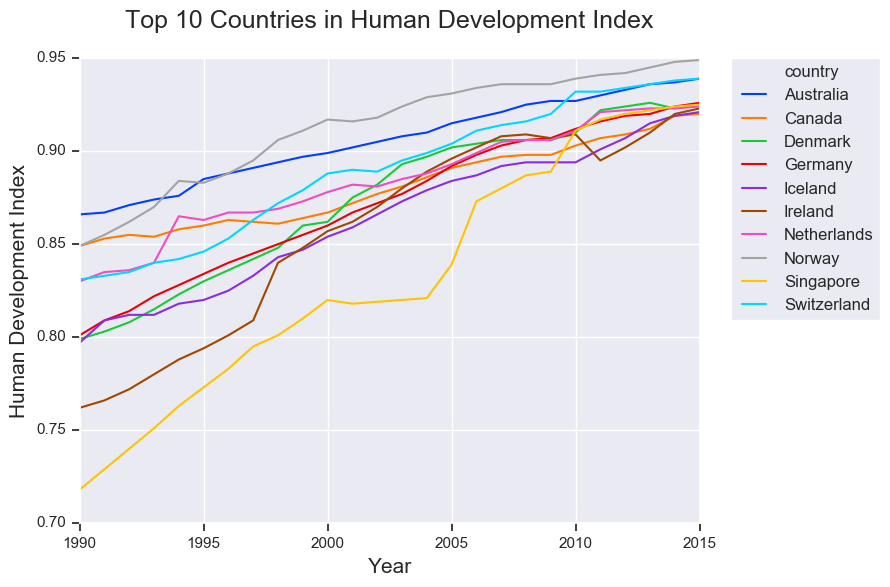

In [211]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=human_development_df[human_development_df.country.isin(data_2015[:10].index.tolist())],
                   x='year',y='human_development_index',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Human Development Index',fontsize=15);
plt.title('Top 10 Countries in Human Development Index',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

In [212]:
population_df[population_df.country=='Germany'].max()

country        Germany
year              2018
population    82300000
dtype: object

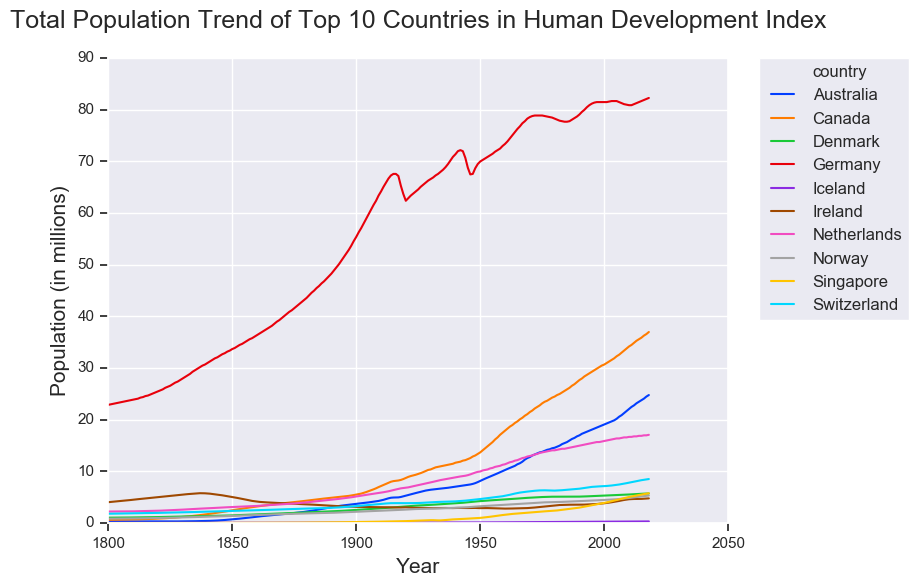

In [213]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=population_df[population_df.country.isin(data_2015[:10].index.tolist())],
                   x='year',y='population',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Population (in millions)',fontsize=15);
plt.title('Total Population Trend of Top 10 Countries in Human Development Index',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);
fig.set_yticklabels([0,10,20,30,40,50,60,70,80,90]);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

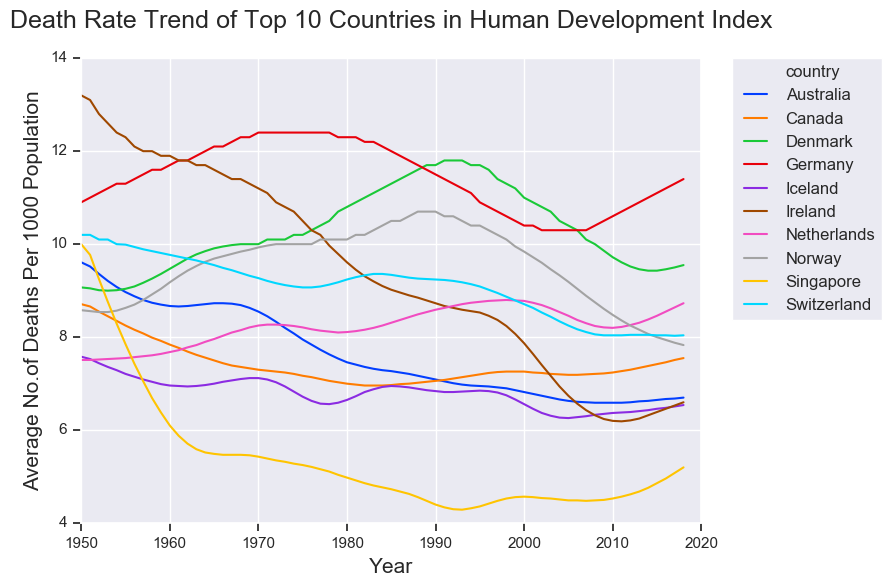

In [214]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=death_rate_df[death_rate_df.country.isin(data_2015[:10].index.tolist())
                                      & (death_rate_df.year<2019)],
                   x='year',y='crude_death_rate',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Average No.of Deaths Per 1000 Population',fontsize=15);
plt.title('Death Rate Trend of Top 10 Countries in Human Development Index',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

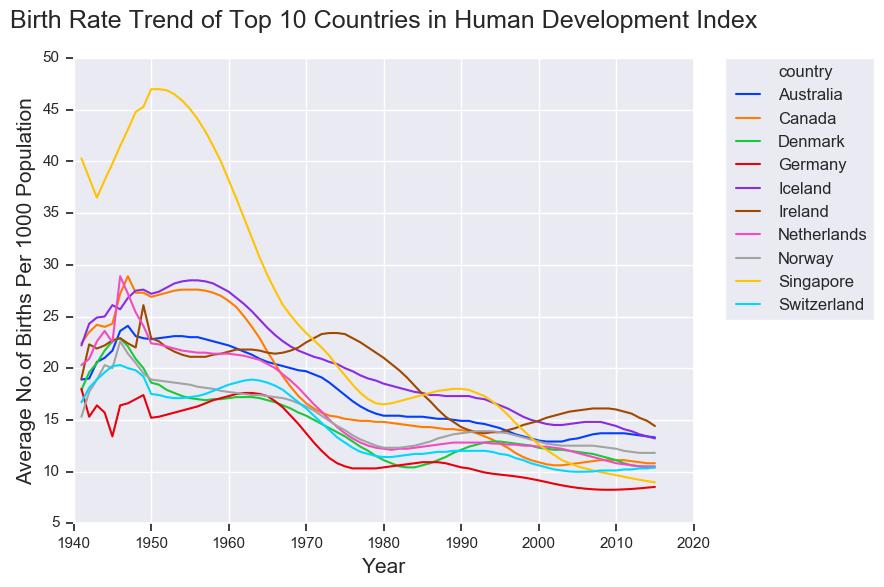

In [215]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=birth_rate_df[birth_rate_df.country.isin(data_2015[:10].index.tolist())
                                      & (birth_rate_df.year>1940)],
                   x='year',y='crude_birth_rate',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Average No.of Births Per 1000 Population',fontsize=15);
plt.title('Birth Rate Trend of Top 10 Countries in Human Development Index',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

Lets find the rate of growth for each country by taking the difference in HD index between 1990 and 2015

In [216]:
# population difference between 1990 and 2015
diff_hd_index = data_2015 - data_1990

In [217]:
diff_hd_index.sort_values('human_development_index',ascending=False,inplace=True)
diff_hd_index[:10]

human_development_index
country                            
Rwanda                        0.254
China                         0.239
Mali                          0.220
Mozambique                    0.209
Singapore                     0.207
Vietnam                       0.206
Cambodia                      0.206
Myanmar                       0.203
Iran                          0.202
India                         0.196

These are the top 10 countries that have improved in HD index in 25 years.Let's plot their trend

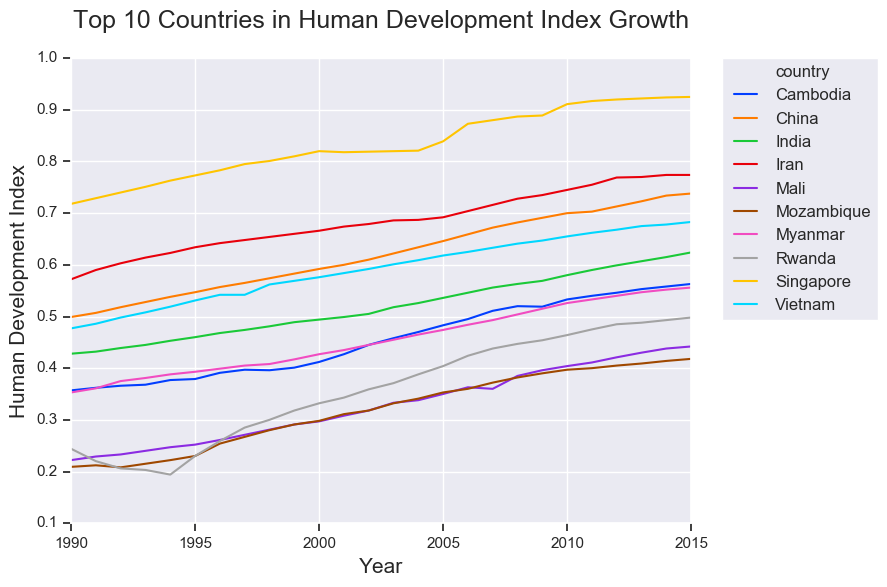

In [218]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=human_development_df[human_development_df.country.isin(diff_hd_index[:10].index.tolist())],
                   x='year',y='human_development_index',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Human Development Index',fontsize=15);
plt.title('Top 10 Countries in Human Development Index Growth',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

HD index is on a rising trend for these countries.

In [219]:
population_df[population_df.country=='India'].max()

country            India
year                2018
population    1350000000
dtype: object

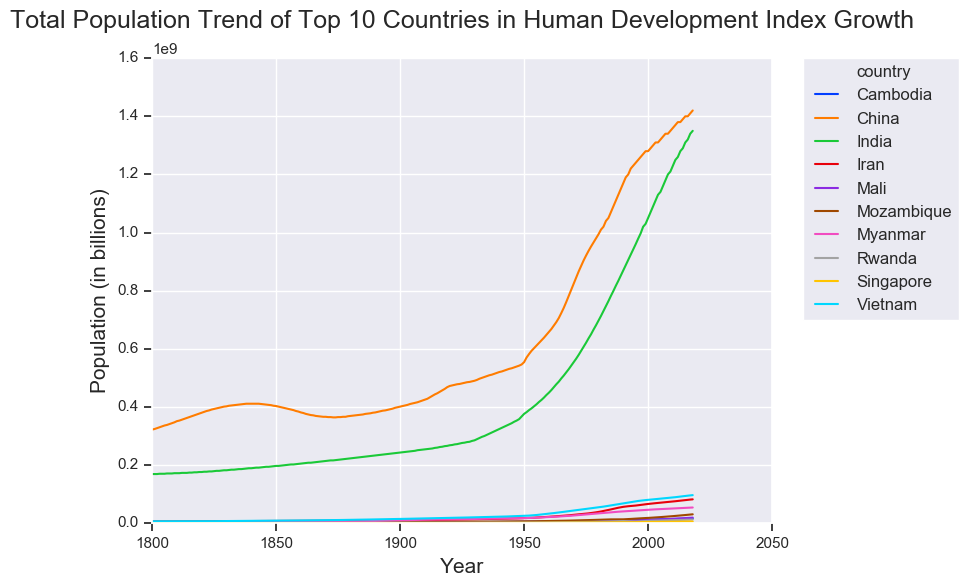

In [220]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=population_df[population_df.country.isin(diff_hd_index[:10].index.tolist())],
                   x='year',y='population',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Population (in billions)',fontsize=15);
plt.title('Total Population Trend of Top 10 Countries in Human Development Index Growth',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

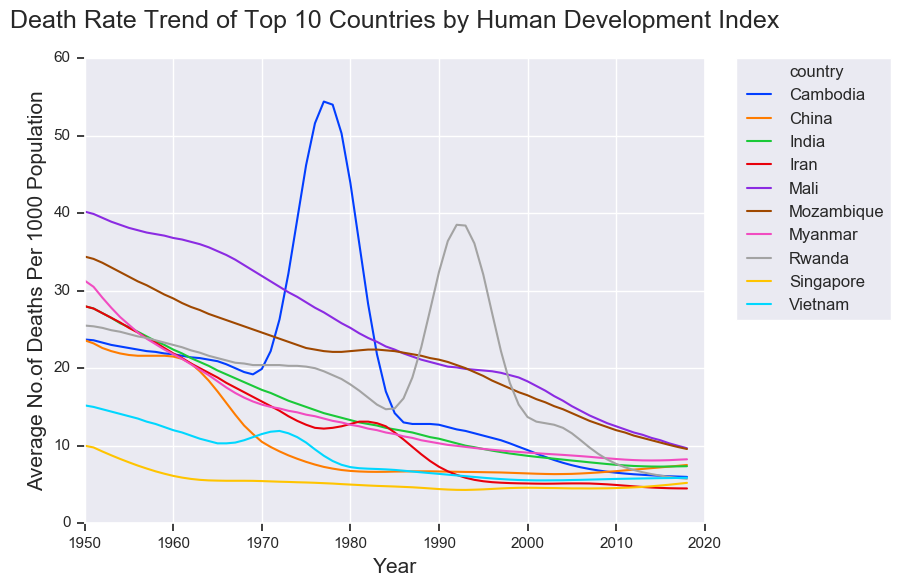

In [221]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=death_rate_df[death_rate_df.country.isin(diff_hd_index[:10].index.tolist())
                                      & (death_rate_df.year<2019)],
                   x='year',y='crude_death_rate',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Average No.of Deaths Per 1000 Population',fontsize=15);
plt.title('Death Rate Trend of Top 10 Countries by Human Development Index',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

>**Observation:** There's a sudden peak in number of deaths for Cambodia and Rwanda between 1970 to 1985 and 1985 to 2000 respectively. Each is a duration of 15 years. Must be something!

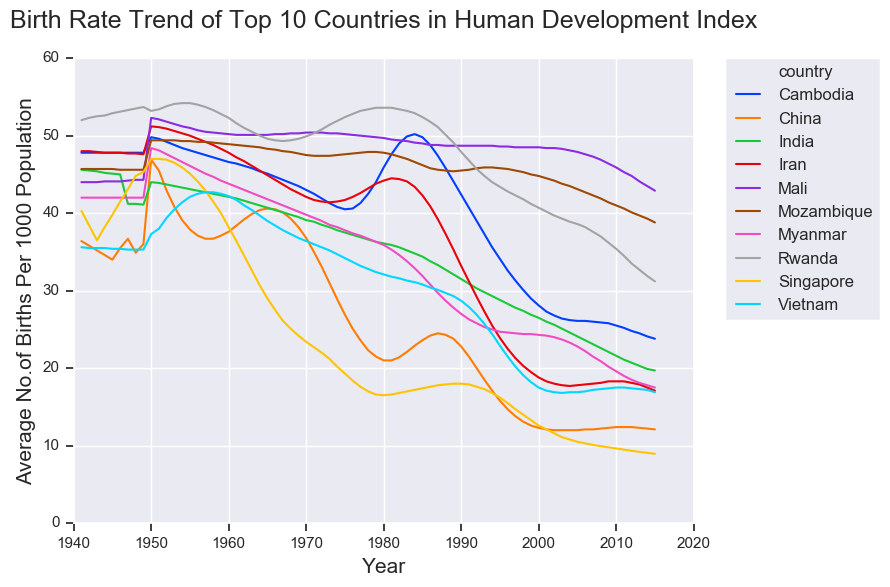

In [222]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=birth_rate_df[birth_rate_df.country.isin(diff_hd_index[:10].index.tolist())
                                      & (birth_rate_df.year>1940)],
                   x='year',y='crude_birth_rate',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Average No.of Births Per 1000 Population',fontsize=15);
plt.title('Birth Rate Trend of Top 10 Countries in Human Development Index',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

In [223]:
diff_hd_index[-10:]

human_development_index
country                                     
Eritrea                                0.015
Grenada                                0.013
Bahamas                                0.013
Antigua and Barbuda                    0.013
Kiribati                               0.012
Tajikistan                             0.011
Lesotho                                0.004
Swaziland                             -0.007
South Sudan                           -0.011
Syria                                 -0.020

These are the last 10 in HD index growth in 25 years. It is surprising that 3 countries have reduced in HD index. We'll plot them now.

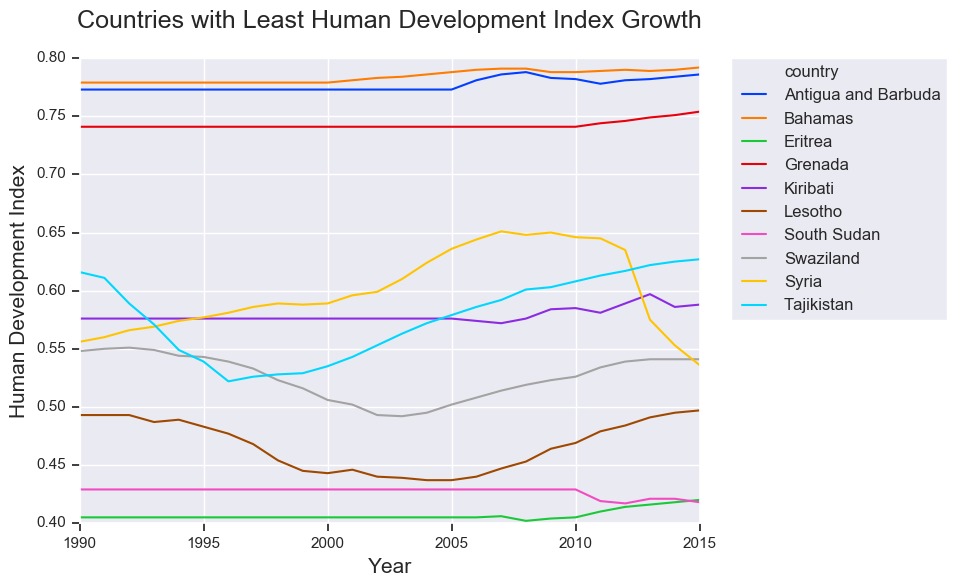

In [224]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=human_development_df[human_development_df.country.isin(diff_hd_index[-10:].index.tolist())],
                   x='year',y='human_development_index',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Human Development Index',fontsize=15);
plt.title('Countries with Least Human Development Index Growth',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

We can see that for these countries, the index is fairly linear without much change.

In [225]:
population_df[population_df.country=='Syria'].max()

country          Syria
year              2018
population    21000000
dtype: object

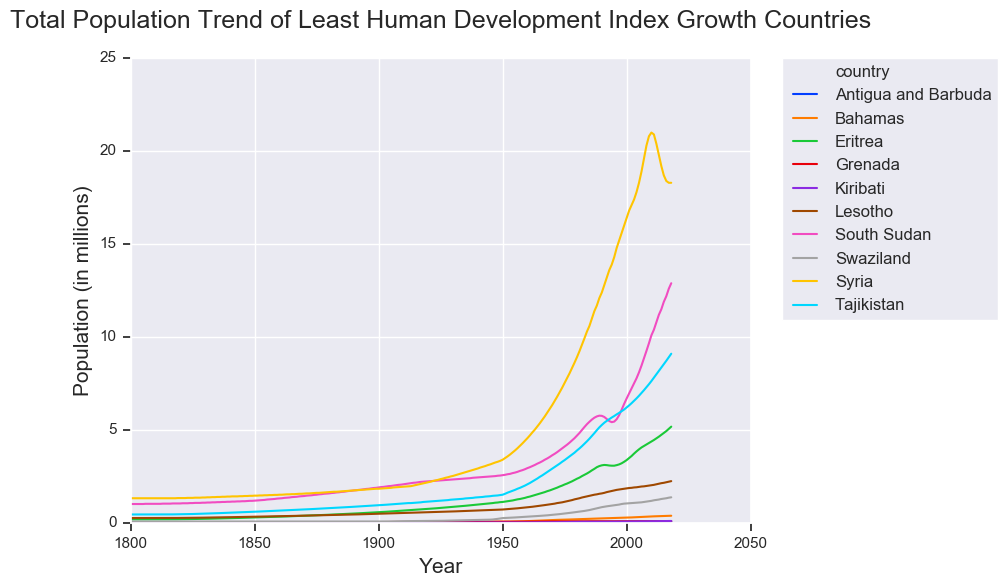

In [226]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=population_df[population_df.country.isin(diff_hd_index[-10:].index.tolist())],
                   x='year',y='population',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Population (in millions)',fontsize=15);
plt.title('Total Population Trend of Least Human Development Index Growth Countries',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);
fig.set_yticklabels([0,5,10,15,20,25]);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

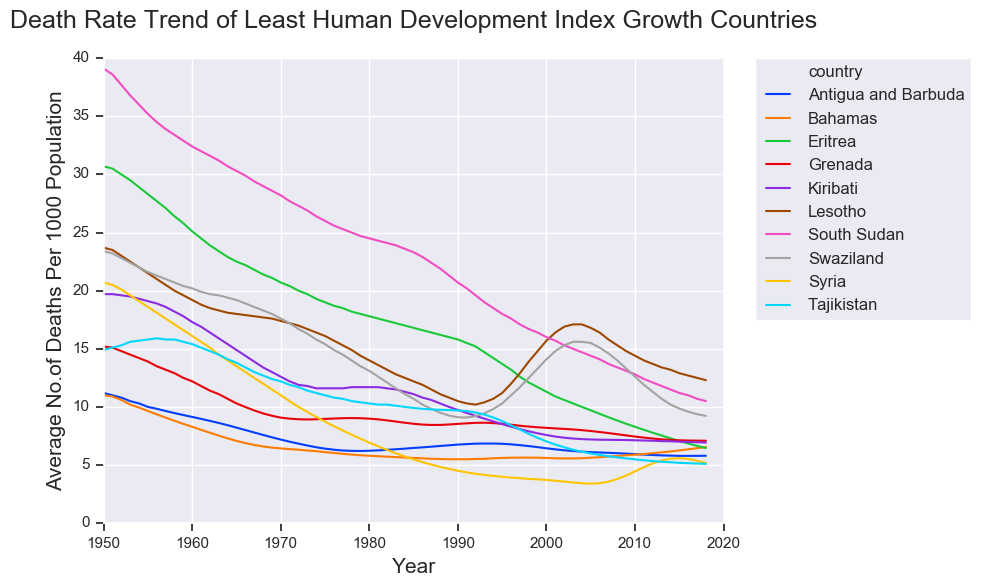

In [227]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=death_rate_df[death_rate_df.country.isin(diff_hd_index[-10:].index.tolist())
                                      & (death_rate_df.year<2019)],
                   x='year',y='crude_death_rate',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Average No.of Deaths Per 1000 Population',fontsize=15);
plt.title('Death Rate Trend of Least Human Development Index Growth Countries',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

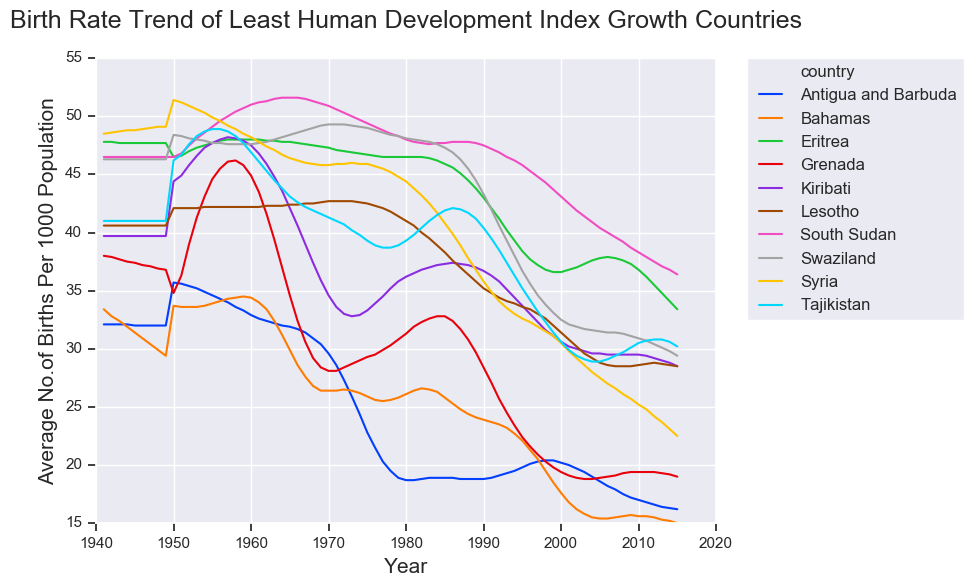

In [228]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=birth_rate_df[birth_rate_df.country.isin(diff_hd_index[-10:].index.tolist())
                                      & (birth_rate_df.year>1940)],
                   x='year',y='crude_birth_rate',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Average No.of Births Per 1000 Population',fontsize=15);
plt.title('Birth Rate Trend of Least Human Development Index Growth Countries',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

Let's check index growth for top 10 countries by population

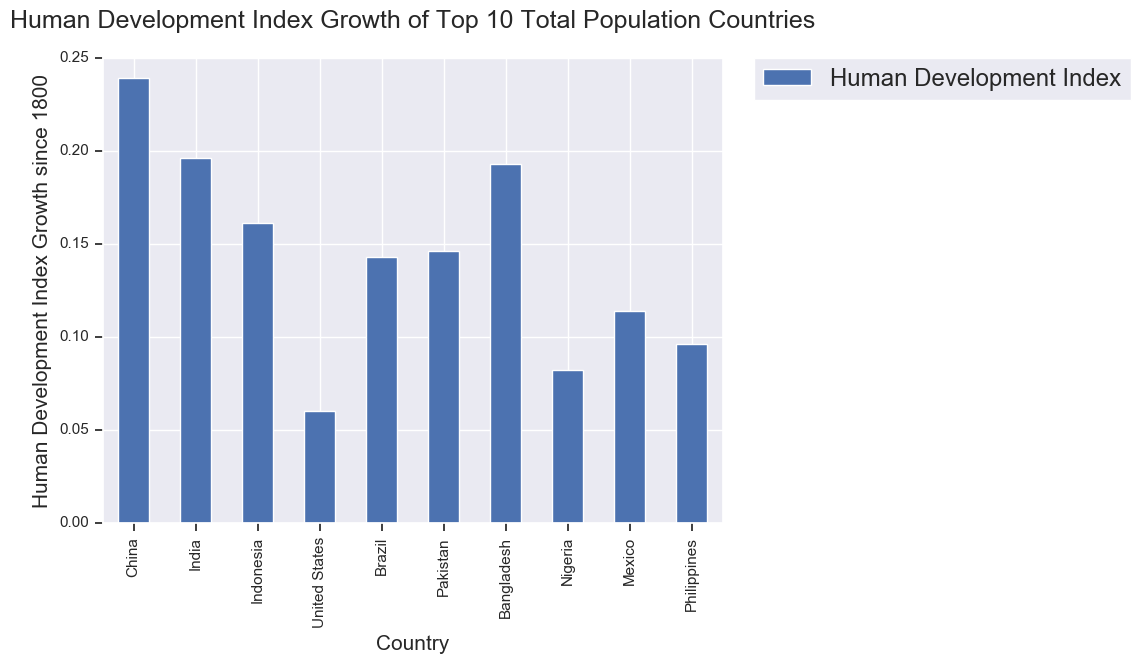

In [229]:
# plot top 10 population growth countries since 1950
fig = diff_hd_index.loc[diff_population.index[:10].tolist()].plot(kind='bar',figsize=(8,6));

# set legend,label and title
plt.legend(['Human Development Index'],fontsize='x-large',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xlabel('Country',fontsize=15);
plt.ylabel('Human Development Index Growth since 1800',fontsize=15);
plt.title('Human Development Index Growth of Top 10 Total Population Countries',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

Since HD index is based on various factors, let's also check index with economy below

### Is there a relationship between Human Development Index and  Income?
We have the data for income per person, which is in international dollars fixed 2011 prices and is adjusted for purchasing power.

In [230]:
# get minimum and maximum years from Income Dataframe
print(income_df.year.min())
print(income_df.year.max())

1800
2018


In [231]:
#*************************************************#
# get country population for specific years
#*************************************************#

# year: 1800
data_1800 = income_df[income_df.year==1800].loc[:,['country','income_per_person']].set_index('country')

# year: 2018
data_2018 = income_df[income_df.year==2018].loc[:,['country','income_per_person']].set_index('country')

In [232]:
data_2018.sort_values('income_per_person',ascending=False,inplace=True)
data_2018[:10]

income_per_person
country                                
Qatar                            121000
Luxembourg                        99000
Singapore                         83900
Brunei                            76900
Kuwait                            68400
United Arab Emirates              68200
Ireland                           65600
Norway                            64800
Monaco                            60700
Switzerland                       57100

These are the top 10 countries by income per person. The data is for the year 2018.

In [233]:
data_2015[:10]

human_development_index
country                             
Norway                         0.949
Switzerland                    0.939
Australia                      0.939
Germany                        0.926
Singapore                      0.925
Denmark                        0.925
Netherlands                    0.924
Ireland                        0.923
Iceland                        0.921
Canada                         0.920

We can already see that out of top 10 countries by HD index for the year 2015, 4 countries are in top 10 list for countries ranked by income per person.

We will now plot top countries by income for the year 2018.

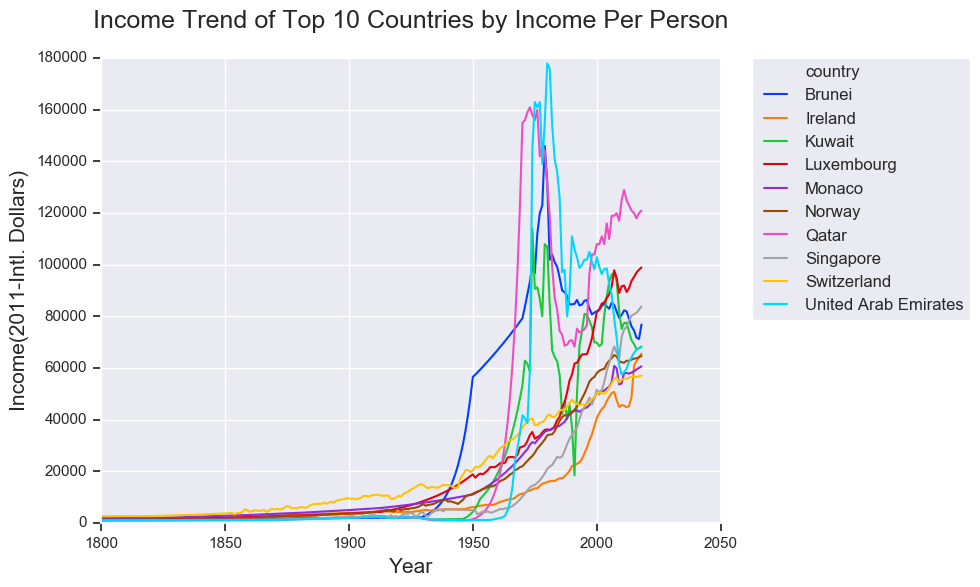

In [234]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=income_df[income_df.country.isin(data_2018[:10].index.tolist())],
                   x='year',y='income_per_person',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Income(2011-Intl. Dollars)',fontsize=15);
plt.title('Income Trend of Top 10 Countries by Income Per Person',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

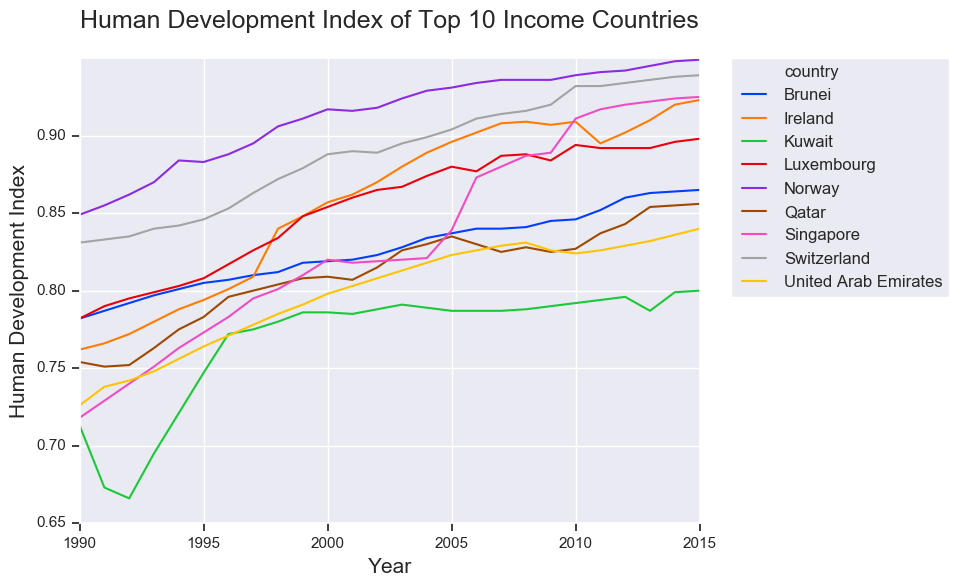

In [235]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=human_development_df[human_development_df.country.isin(data_2018[:10].index.tolist())],
                   x='year',y='human_development_index',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Human Development Index',fontsize=15);
plt.title('Human Development Index of Top 10 Income Countries',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

In [236]:
# income difference between 1800 and 2018
diff_income = data_2018 - data_1800

In [237]:
diff_income.sort_values('income_per_person',ascending=False,inplace=True)
diff_income[:10]

income_per_person
country                                
Qatar                            119900
Luxembourg                        97550
Singapore                         82880
Brunei                            75390
Kuwait                            67300
United Arab Emirates              67202
Ireland                           64150
Norway                            63520
Monaco                            58750
Switzerland                       54400

These are the top 10 countries by income growth since 1800

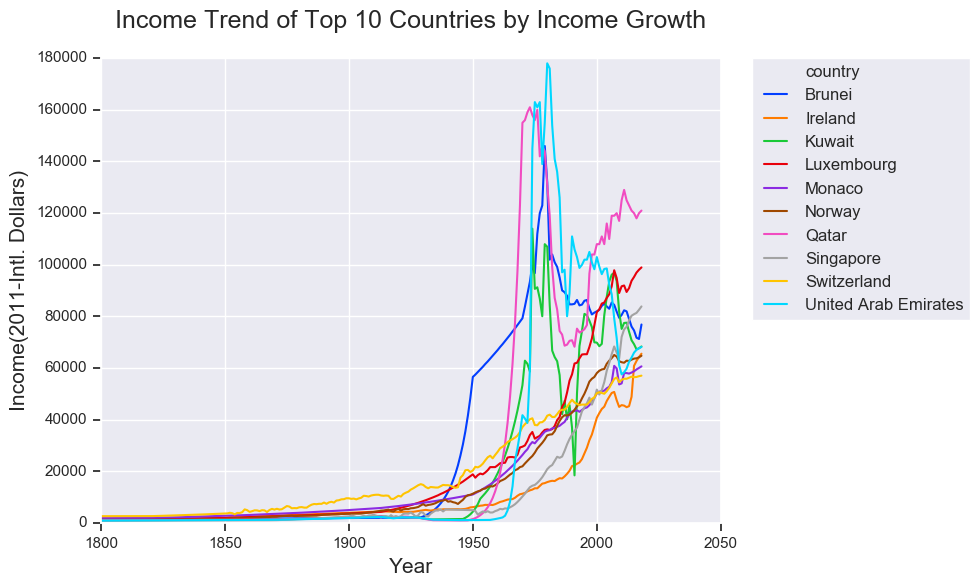

In [238]:
# set plot size
plt.subplots(figsize=(8,6));

# plot the trend
fig = sns.lineplot(data=income_df[income_df.country.isin(diff_income[:10].index.tolist())],
                   x='year',y='income_per_person',hue='country',palette='bright');

#set legend,label and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='medium');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Income(2011-Intl. Dollars)',fontsize=15);
plt.title('Income Trend of Top 10 Countries by Income Growth',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

We will also check how top 10 countries by population has performed

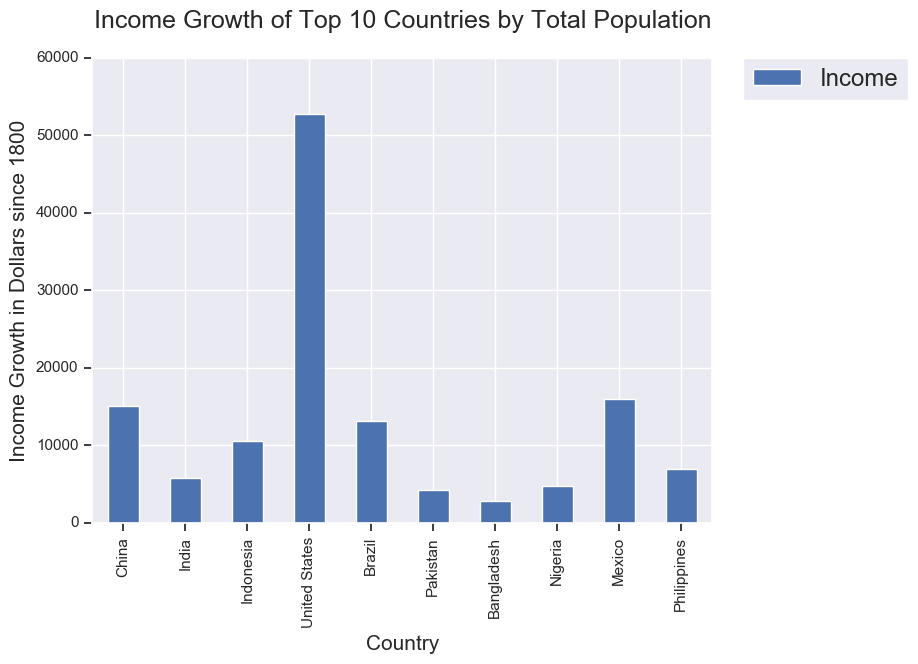

In [239]:
# plot top 10 population growth countries since 1950
fig = diff_income.loc[diff_population.index[:10].tolist()].plot(kind='bar',figsize=(8,6));

# set legend,label and title
plt.legend(['Income'],fontsize='x-large',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xlabel('Country',fontsize=15);
plt.ylabel('Income Growth in Dollars since 1800',fontsize=15);
plt.title('Income Growth of Top 10 Countries by Total Population',fontsize=18);

# turn-off ticks in right and top axes
plt.tick_params(axis='both',which='both',top=False,right=False);

# pad spaces below title
ttl = fig.title;
ttl.set_position([.5, 1.05]);

#### RELATIONSHIPS:
Now that we have analysed our dataset for these indicators, lets also check their relationship

In [240]:
human_development_df.year.min()

1990

#### Income & Development index :

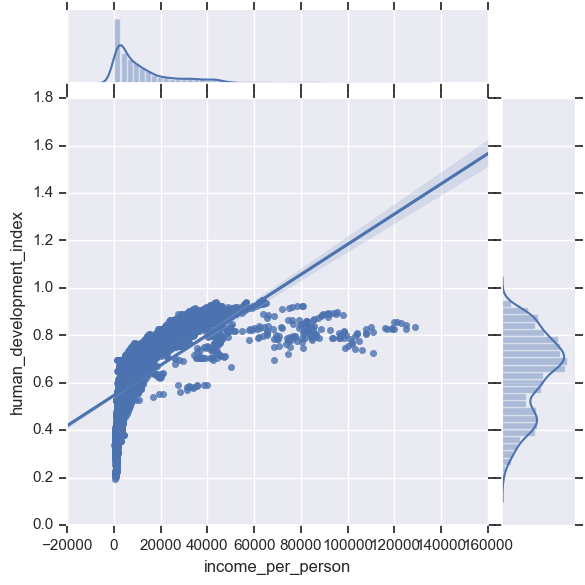

In [241]:
sns.jointplot(data=data_set[data_set.year>1989], y = 'human_development_index',
              x = 'income_per_person',kind='reg');

>**Observation:** As expected, there is positive correlation between Income and Human Development Index

#### Life Expectancy & Development Index :

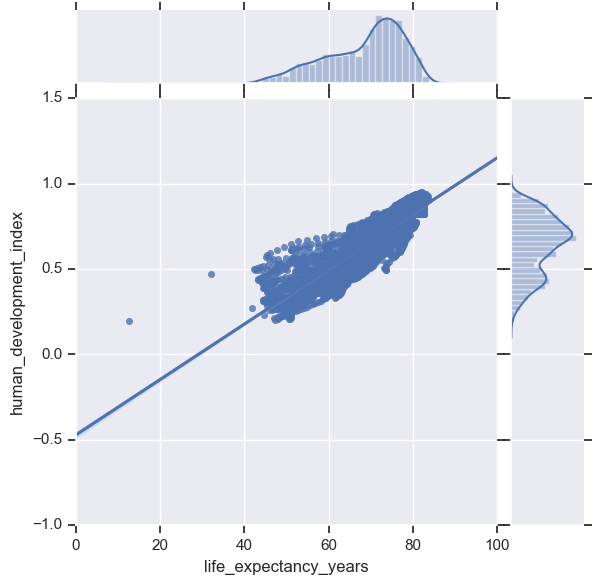

In [242]:
sns.jointplot(data=data_set[data_set.year>1989], y = 'human_development_index',
              x = 'life_expectancy_years',kind='reg');

>**Observation:** There is high positive correlation between Life Expectancy and Human Development Index

#### Death Rate & Development Index :

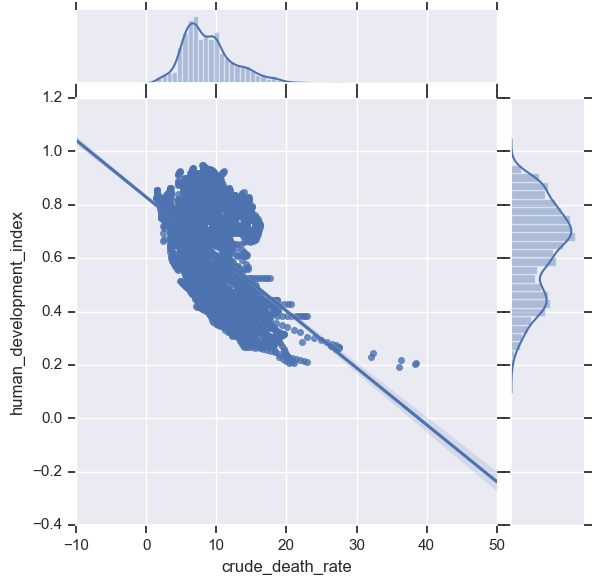

In [243]:
sns.jointplot(data=data_set[data_set.year>1989], y = 'human_development_index',
              x = 'crude_death_rate',kind='reg');

>**Observation:** There is negative correlation between Death Rate and Human Development Index

#### Child Mortality & Development Index :

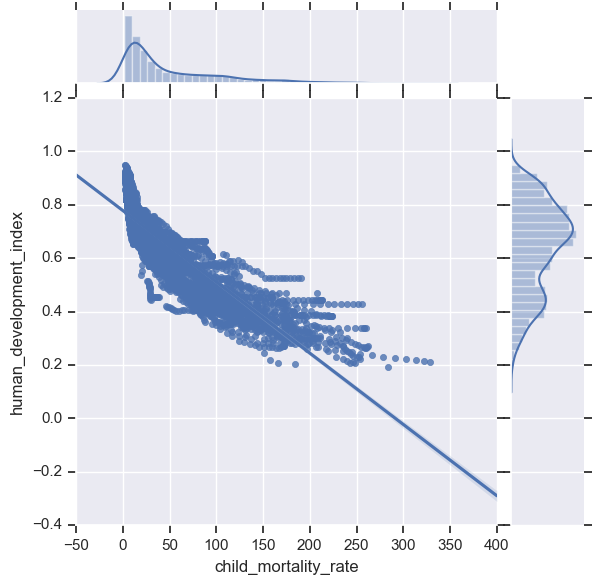

In [244]:
sns.jointplot(data=data_set[data_set.year>1989], y = 'human_development_index',
              x = 'child_mortality_rate',kind='reg');

>**Observation:** There is high negative correlation between Child Mortality Rate and Human Development Index

#### Total Population & Development Index :

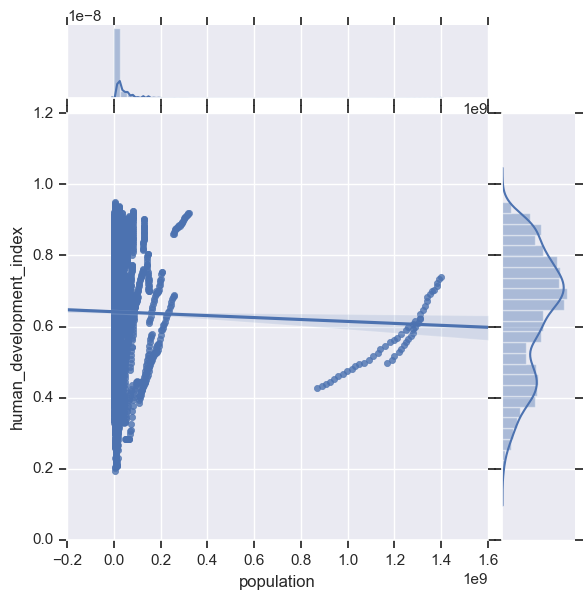

In [245]:
sns.jointplot(data=data_set[data_set.year>1989], x = 'population', y = 'human_development_index',kind='reg');

>**Observation:** There is no correlation between Total Population and Human Development Index

#### Urban Population & Development Index :

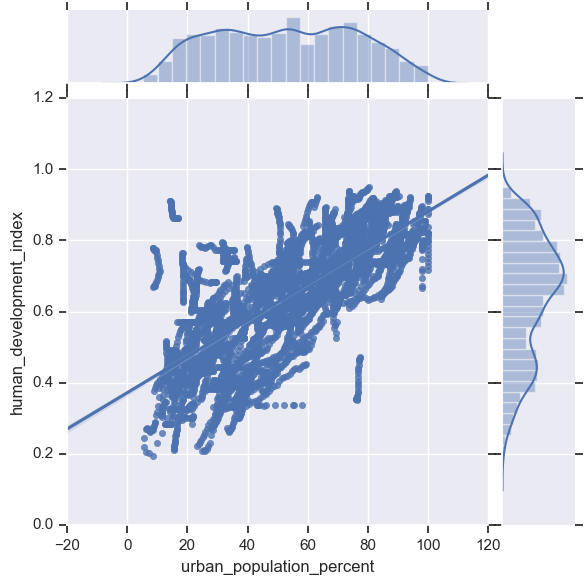

In [246]:
sns.jointplot(data=data_set[data_set.year>1989], x = 'urban_population_percent',
              y = 'human_development_index',kind='reg');

>**Observation:** There is high positive correlation between Urban Population and Human Development Index

#### Sanitaion Access & Development Index :

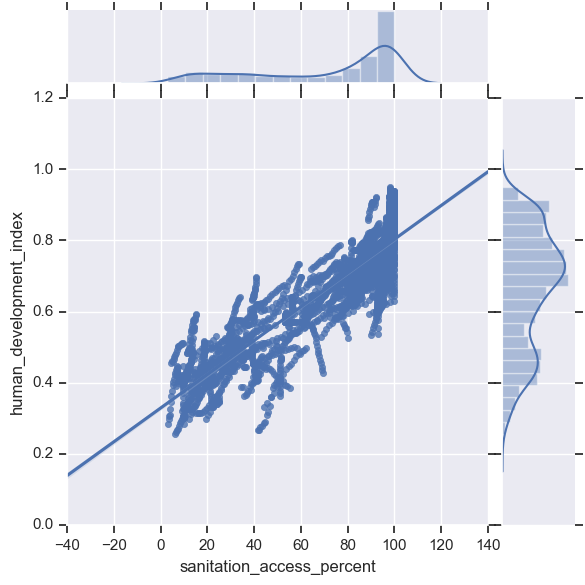

In [247]:
sns.jointplot(data=data_set[data_set.year>1989], x = 'sanitation_access_percent',
              y = 'human_development_index',kind='reg');

>**Observation:** There is high positive correlation between Sanitation Access and Human Development Index

#### Water Access & Development Index :

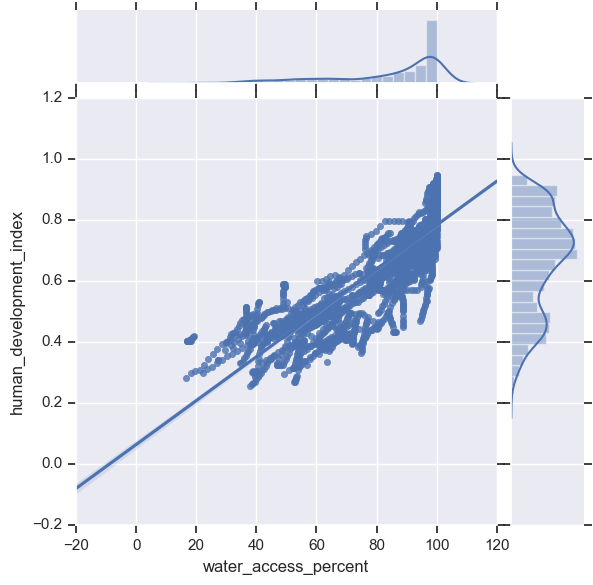

In [248]:
sns.jointplot(data=data_set[data_set.year>1989], x = 'water_access_percent',
              y = 'human_development_index',kind='reg');

>**Observation:** There is high positive correlation between Water Access and Human Development Index

#### Internet Access & Development Index :

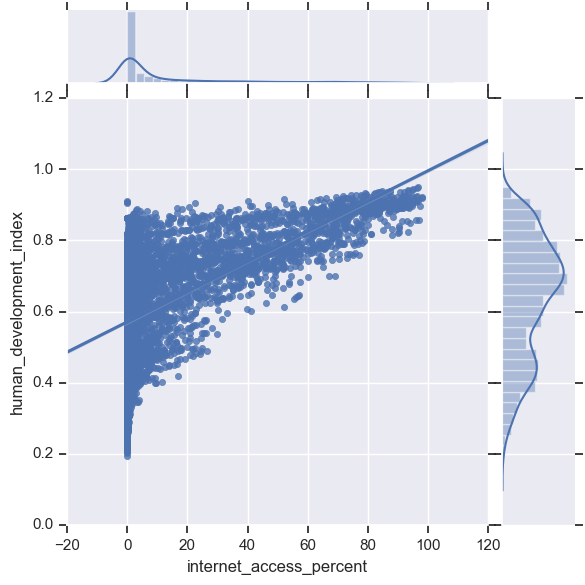

In [249]:
sns.jointplot(data=data_set[data_set.year>1989], x = 'internet_access_percent',
              y = 'human_development_index',kind='reg');

>**Observation:** There is positive correlation between Internet Access and Human Development Index

<a id='conclusions'></a>
## Conclusion

>#### Observation 1 : The global population is on a rising trend. Individually, the trends of the countries also point the same.

>#### Observation 2 : Increase in Total Population of the country does not require increase in Urban Population. The relation between these two is less

>#### Observation 3 : Increase in population in various countries inspite of decreased number of births is due to rapid decrease in death rate

>#### Observation 4 : There is high positive correlation between Human Development Index and various indicators such as Water Access, Sanitation Access, Internet Access, Urban Population %, Life Expectancy and Income

>#### Observation 5 : There is high negative correlation between Human Development Index and Child Mortality, Death Rate

>#### Observation 6 : There is no correlation between Human Development Index and Total Population Growth

### Limitations

> **1. NUMBER :** The data used for analysis is not very exhaustive, meaning we cannot conclude results or relationships although observations can be made.

> **2. QUALITY :** The data is cleaned for analysis by filling missing values or dropping them altogether. The outcome of this analysis is limited by the quality of data.

> **3. SOURCE :** he data presented has been collected from various sources. The credibility of the sources and thereby the credibility of data used for analysis is limited due to unavailability of credible data.

In [250]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0